# Abstract
1. 분석과제 : 유니콘 기업 찾기
2. 분석 방법 및 단계 
    1. 2019년 연매출액 데이터가 있는 경우
        - 2019년 매출액이 100억 이상
        - 최대 월별_직원수 100명 이상
        - 회사 평균 매출액 250억 이상   
    2. 2019년 연매출액 데이터가 없는 경우
        - 연매출액이 1개년만 있는 회사 제외
        - 최대 연매출액 100억 이상
        - 최대 월별_직원수 100명 이상
        - 회사 평균 매출액 250억 이상
        
     **추가적으로 진행한 부분**
        - 2년 연속 연매출액이 증가한 경우
        - 한번이라도 20% 이상의 매출 증가율을 기록한 경우
        - 매년 연금보험금이 10% 이상씩 증가 (= 월급의 증가)

위와 같은 조건에 의해 회사를 추렸고, 마지막에 연매출액, 월별_직원수의 그래프를 보고 최종 유니콘 기업을 판단.<br>
*그래프 상으로 유니콘 기업의 평가 기준 : 연매출액의 급격한 성장, 월별 직원수의 꾸준한 증가*

## 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

#한글 폰트 깨짐 방지
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family
get_font_family()
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)


## data 불러오기

In [2]:
df = pd.read_csv("D:/취업준비/원티드 프리온보딩/company_nps_data.csv", engine='python')
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [5]:
df[df['회사ID']==132156]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
2675,132156,30066323,2016,12,12369440,60
3857,132156,44722613,2017,5,12907640,63
4475,132156,30066323,2016,1,9603680,52
5162,132156,30066323,2016,9,12243440,56
7685,132156,81633567,2018,7,22141700,87
8681,132156,81633567,2018,4,18006260,83
10623,132156,30066323,2016,3,10168940,56
16026,132156,81633567,2018,3,16620980,77
17306,132156,44722613,2017,12,14550880,66
21834,132156,44722613,2017,6,12913660,64


In [175]:
print(df.shape)

(99801, 7)


In [177]:
print(df.dtypes)

회사ID         int64
연매출액         int64
년도           int64
월            int64
월별_연금보험료     int64
월별_직원수       int64
날짜          object
dtype: object


In [178]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


# data EDA

## 회사ID

In [171]:
df['회사ID'].value_counts()

155754     50
237625     50
296819     50
395238     50
442525     50
           ..
2256869     1
573311      1
317847      1
440452      1
1983879     1
Name: 회사ID, Length: 5000, dtype: int64

<AxesSubplot:>

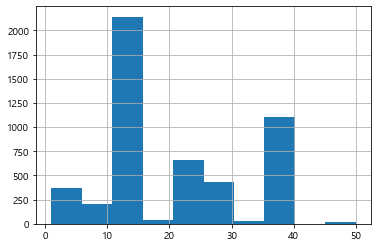

In [172]:
df['회사ID'].value_counts().hist()

1개년 정도만 있는 회사의 수가 가장 많다.

## 연매출액

In [173]:
df[(df['회사ID'] == 155754) & (df['년도'] == 2015)]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
928,155754,36584256,2015,11,4154780,20,201511
39424,155754,36584256,2015,12,4307780,21,201512


In [183]:
df_12 = df.groupby(['회사ID','년도'])['연매출액'].mean().unstack()
df_12.head()

년도,2015,2016,2017,2018,2019
회사ID,,,,,
63,NaN,NaN,NaN,1.132878e+10,NaN
95,NaN,NaN,NaN,6.569474e+08,NaN
102,NaN,NaN,NaN,7.426589e+08,NaN
295,NaN,NaN,NaN,8.377670e+07,NaN
414,NaN,NaN,NaN,1.973277e+07,NaN


In [185]:
for col in df_12.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_12[col].isnull().sum() / df_12[col].shape[0]))
    print(msg)

column:       2015	 Percent of NaN value: 63.46%
column:       2016	 Percent of NaN value: 35.76%
column:       2017	 Percent of NaN value: 69.92%
column:       2018	 Percent of NaN value: 30.12%
column:       2019	 Percent of NaN value: 98.52%


<AxesSubplot:>

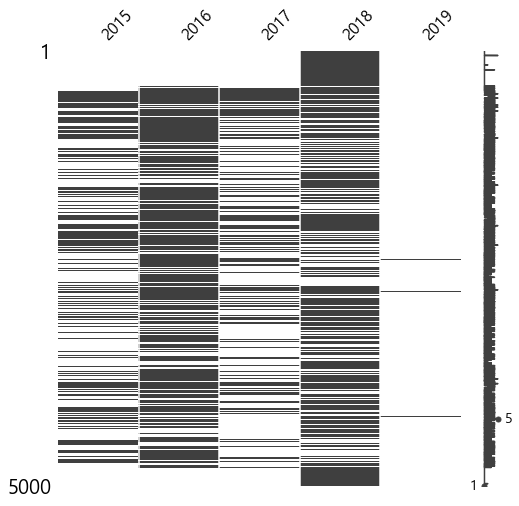

In [186]:
msno.matrix(df=df_12.iloc[:, :], figsize=(8, 8))

년도별 연매출액에 null data가 굉장히 많이 존재한다.

# 분석

## 2019년 연매출액 데이터가 있는 경우

In [104]:
# 날짜 변수 (년도+달)
df['날짜'] = pd.to_datetime(df['년도'].astype(str) + df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

In [105]:
# 2019년 데이터만 추출
df_2019 = df[df['년도']==2019]
df_2019.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
35,395238,3948832,2019,10,5308140,25,201910
52,192812,10353415,2019,7,5480520,17,201907
244,3312354,1451563,2019,9,1312200,3,201909
353,2037,16308882,2019,11,29120920,92,201911
554,193239,1022910,2019,1,972080,6,201901


### 2019년 매출액 100억 이상

In [117]:
# 2019년 매출이 100억 이상인 회사ID 추출
condition_11 = df_2019[df_2019['연매출액'] >= 10000000]['회사ID'].unique()
condition_11

array([192812,   2037, 510449, 135668, 134575, 128174, 297542, 140370,
       294367, 130261, 315996, 440559, 138077, 419945, 250472, 442467,
       139442, 165163, 155754, 155829, 130023, 296819, 131998, 297682,
       440884, 303882, 305146, 420165], dtype=int64)

In [118]:
len(condition_11)

28

### 2019년 12월 직원수 100명 이상

In [23]:
# 2019년 회사별 최댓값 계산 
df_12 = df_2019.groupby(['회사ID'], as_index=False).max()
df_12

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
0,2037,16308882,2019,12,29120920,92,201912
1,8208,4151961,2019,12,20443880,56,201912
2,14271,9039340,2019,12,5302140,24,201912
3,47306,345228,2019,12,1279800,7,201912
4,128174,105847542,2019,12,48260820,145,201912
...,...,...,...,...,...,...,...
69,581504,1079693,2019,12,1507500,7,201912
70,620445,767324,2019,12,1021500,5,201912
71,2693684,238076,2019,12,438120,3,201912
72,3312354,1451563,2019,12,1312200,3,201912


In [24]:
# 2019년 평균 직원수가 100명 이상인 회사ID 추출
condition_12 = np.array(df_12[df_12['월별_직원수'] >= 100]['회사ID'])
condition_12

array([128174, 130023, 294367, 419945, 420165, 440559, 510449],
      dtype=int64)

In [25]:
len(condition_12) #2019년 평균 직원수가 100명 이상인 회사 총 7개

7

### 평균 매출액이 250억 이상

In [26]:
# 회사&년도별 평균값 계산
df_13 = df.groupby(['회사ID','년도'], as_index=False).mean()
df_13.head()

,회사ID,년도,연매출액,월,월별_연금보험료,월별_직원수
0,63,2018,1.132878e+10,6.5,4.101282e+08,1007.166667
1,95,2018,6.569474e+08,6.5,2.148378e+08,541.000000
2,102,2018,7.426589e+08,8.5,1.737695e+08,752.125000
3,295,2018,8.377670e+07,8.5,7.731204e+07,259.500000
4,414,2018,1.973277e+07,6.5,7.759019e+07,247.583333


In [27]:
# 평균 매출액이 250억 이상인 회사ID 추출
condition_13 = np.array(df_13[df_13['연매출액'] > 25000000]['회사ID'])
condition_13

array([    63,     95,    102, ..., 613233, 630190, 635082], dtype=int64)

In [28]:
len(condition_13) # 평균 매출액이 250억 이상이 회사 총 1118개

1118

### 세가지 조건을 모두 만족하는 회사ID 

In [109]:
# 세가지 조선을 모두 만족하는 회사ID 추출
condition_14 = pd.DataFrame(set(condition_11) & set(condition_12) & set(condition_13))
condition_14

,0
0,420165
1,130023
2,419945
3,128174
4,440559
5,510449
6,294367


In [30]:
len(condition_14) #세 가지 조건 모두 만족하는 회사 총 7개

7

### 조건을 만족하는 회사의 그래프 

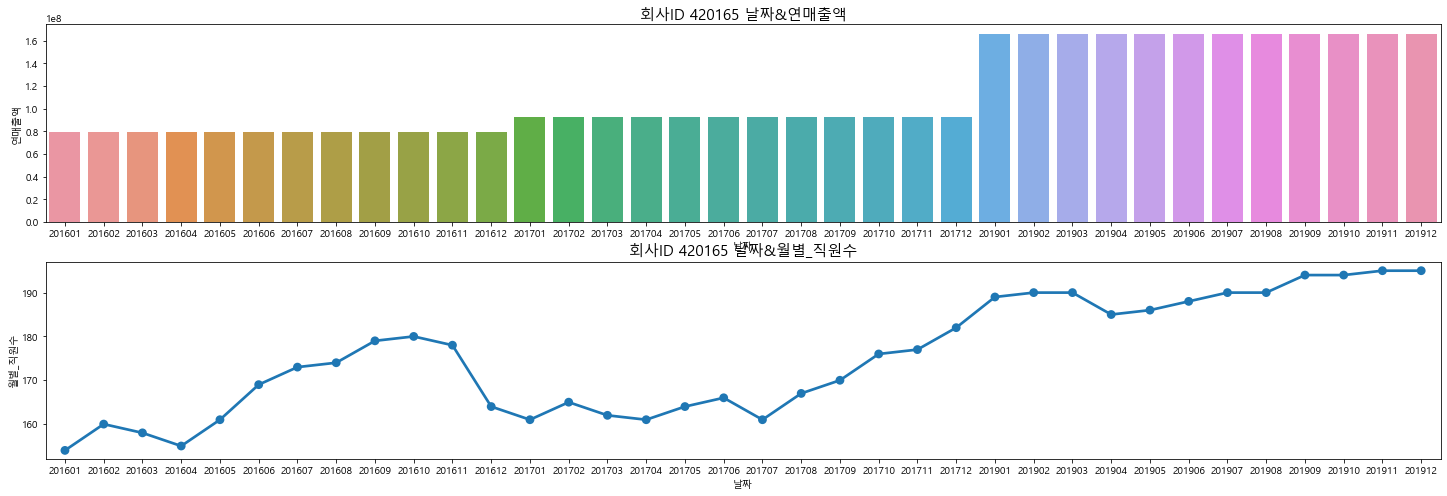

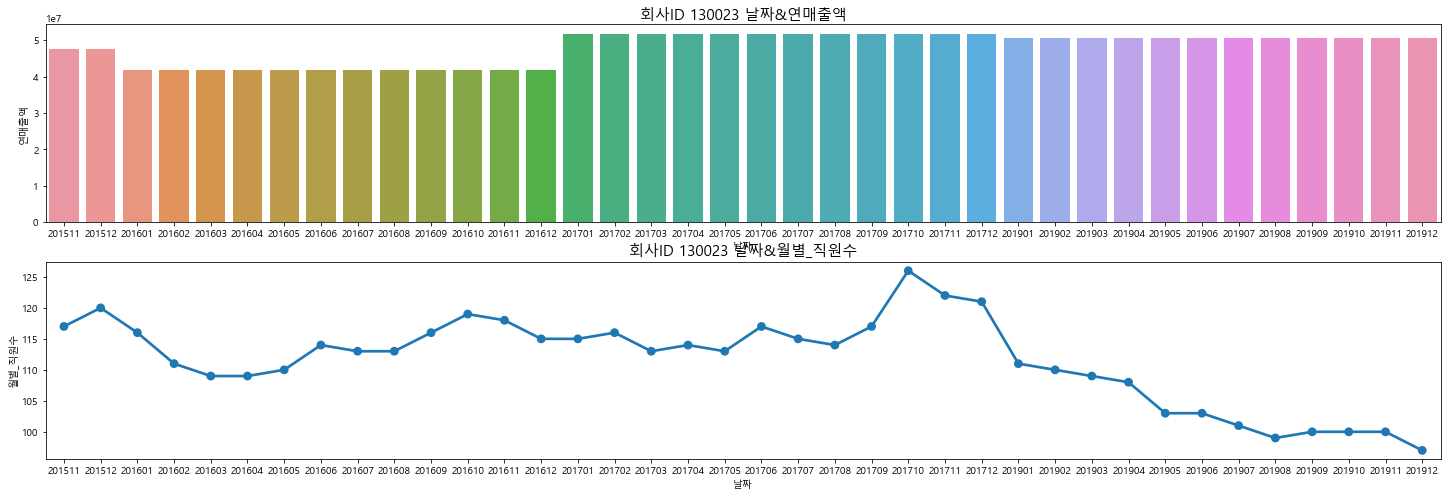

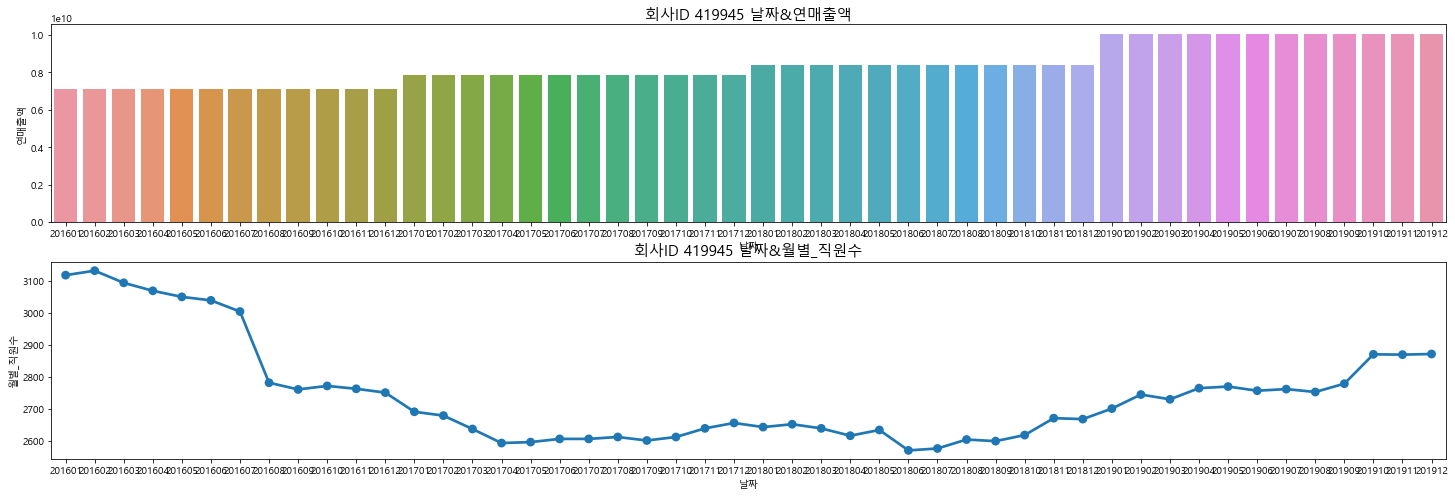

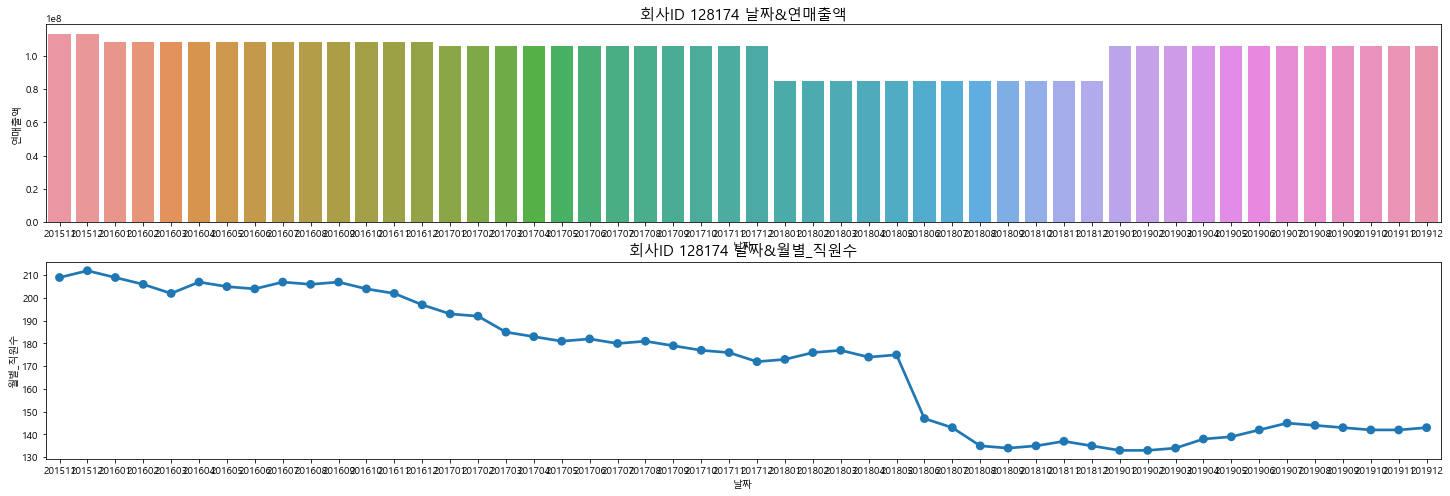

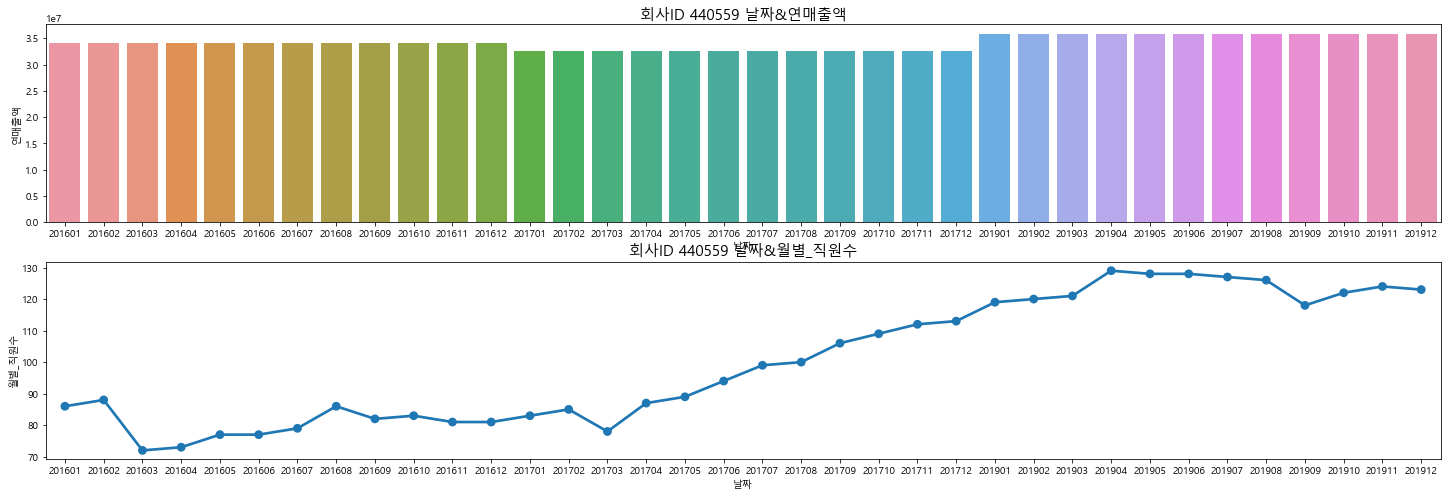

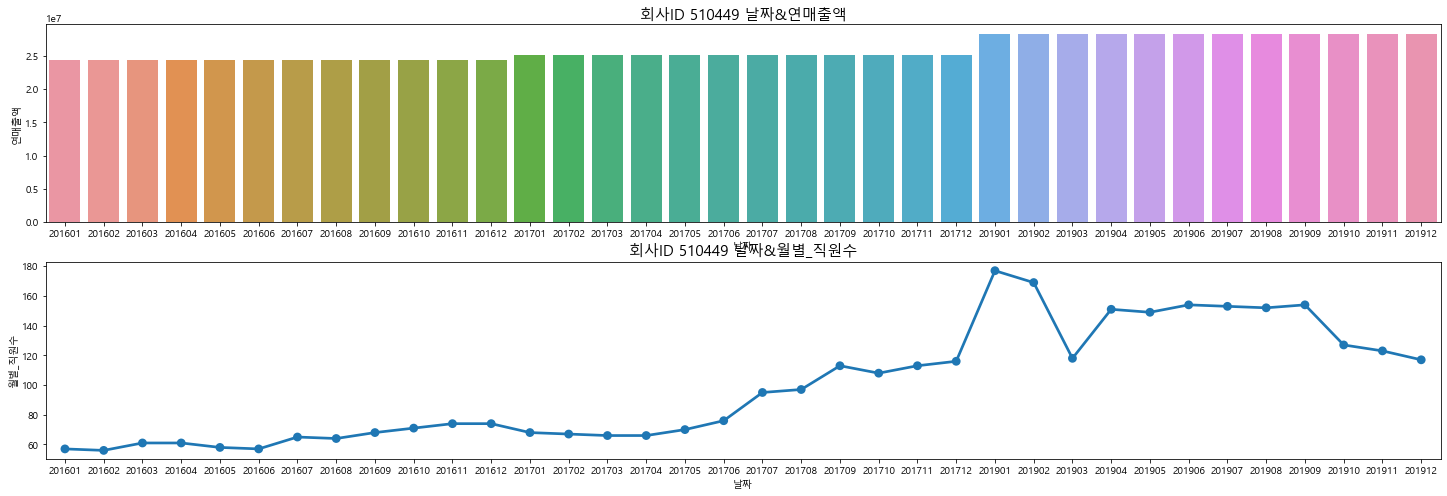

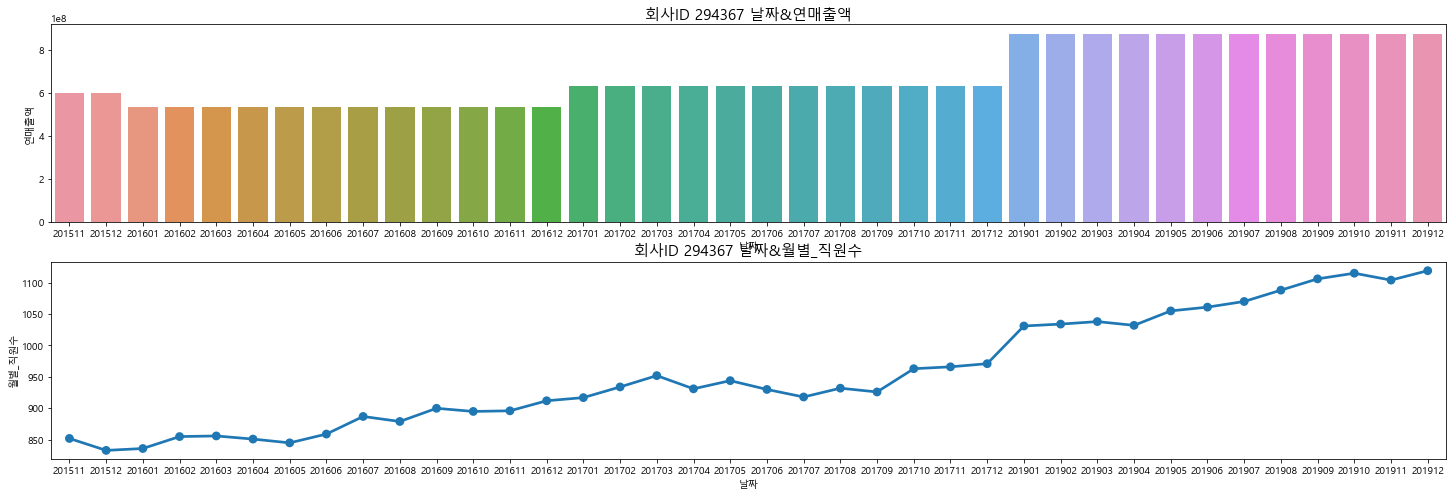

In [31]:
# 날짜&연매출액, 날짜&월별_직원수 변화 그래프
for i in range(len(condition_14)):
    f, ax = plt.subplots(2, 1, figsize=(25, 8))

    sns.barplot(x='날짜', y='연매출액', data=df[df['회사ID'] == condition_14.iloc[i,0]].sort_values(by=['날짜']), ax=ax[0])
    sns.pointplot(data=df[df['회사ID'] == condition_14.iloc[i,0]].sort_values(by=['날짜']), x='날짜', y='월별_직원수', ax=ax[1])
    
    ax[0].set_title("회사ID %s 날짜&연매출액" %condition_14.iloc[i,0], fontsize = 15)
    ax[1].set_title("회사ID %s 날짜&월별_직원수" %condition_14.iloc[i,0], fontsize = 15)              

- 회사ID : 420165, 294367 유니콘 기업이라 생각됨. 

## 2019년 연매출액 데이터가 없는 경우

In [111]:
# 2019년이 아닌 데이터만 추출
df2 = df[df['년도'] != 2019]
df2.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
0,233757,41688077,2018,7,8912380,36,201807
1,123464,1760695,2018,3,942380,5,201803
2,342124,3221341,2018,7,781180,4,201807
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810


### 매출액이 1개년만 있는 회사 제외

In [112]:
# 회사별로 갯수 카운트
df_21 = df2.groupby('회사ID',as_index=False).count()
df_21.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
0,63,12,12,12,12,12,12
1,95,12,12,12,12,12,12
2,102,8,8,8,8,8,8
3,295,8,8,8,8,8,8
4,414,12,12,12,12,12,12


In [119]:
# 갯수가 12개(1년) 보다 큰 회사를 추출
condition_21 = np.array(df_21[df_21['년도']>12]['회사ID'])
condition_21

array([ 14271,  44851,  59533, ..., 515837, 516607, 516653], dtype=int64)

In [121]:
len(condition_21)

2559

### 최대 연매출액이 100억이상

In [122]:
# 회사별 최대 매출액 계산
df_22 = df2.groupby('회사ID',as_index=False).max()
df_22.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
0,63,11328779396,2018,12,419953960,1018,201812
1,95,656947437,2018,12,219997840,562,201812
2,102,742658938,2018,12,178850980,785,201812
3,295,83776697,2018,12,95257960,315,201812
4,414,19732769,2018,12,81070500,251,201812


In [126]:
# 최대 연매출액이 100억 이상이 회사 추출
condition_22 = np.array(df_22[df_22['연매출액'] >= 10000000]['회사ID'])
condition_22

array([     63,      95,     102, ...,  630190,  635082, 1021039],
      dtype=int64)

In [124]:
len(condition_22)

1012

### 최대 월별_직원수 100명 이상

In [128]:
# 최대 월별_직원수 100명 이상인 회사 추출
condition_23 = np.array(df_22[df_22['월별_직원수'] >= 100]['회사ID'])
condition_23

array([    63,     95,    102,    295,    414,    597,    786,    917,
         1125, 126516, 126521, 126538, 126606, 126641, 126664, 126674,
       126772, 126802, 126814, 126831, 126983, 127060, 127065, 127090,
       127142, 127180, 127202, 127366, 127462, 127503, 127511, 127669,
       127732, 127839, 128076, 128149, 128174, 128264, 128405, 128415,
       128440, 128485, 128488, 128539, 128592, 128638, 128675, 128723,
       128896, 128916, 128930, 128985, 129184, 129225, 129243, 129310,
       129370, 129377, 129436, 129486, 129527, 129633, 129652, 129718,
       129774, 129828, 129861, 129895, 130023, 130084, 130128, 130191,
       130203, 130261, 130281, 130322, 130344, 130386, 130387, 130428,
       130512, 130558, 130577, 130647, 130729, 130756, 130764, 130899,
       130911, 130927, 130960, 130966, 131049, 131114, 131228, 131397,
       227414, 227415, 227942, 231080, 231090, 231110, 231173, 231260,
       231383, 231384, 231432, 231476, 231499, 294337, 294367, 294387,
      

In [129]:
len(condition_23)

239

### 평균 매출액이 250억 이상

In [130]:
#회사 평균 연매출액 250억 이상
len(condition_13)

1118

### 네가지 조건을 모두 만족하는 회사

In [131]:
df_24 = pd.DataFrame(set(condition_21) & set(condition_22) & set(condition_23) & set(condition_13))
df_24

,0
0,403462
1,126983
2,403470
3,127503
4,130577
...,...
129,403434
130,510449
131,294387
132,129527


In [134]:
len(df_24) #총 134개 회사 추출

134

In [41]:
df_25 = pd.DataFrame()
for i in range(len(df_24)):
    df_25 = df_25.append(df[df['회사ID'] == df_24.iloc[i,0]])
df_25.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
3757,403462,125610912,2015,11,134205640,385,201511
6157,403462,133208061,2016,12,139864660,390,201612
9052,403462,133208061,2016,10,142539620,397,201610
10782,403462,157122353,2018,11,154291940,383,201811
10994,403462,157122353,2018,2,153363940,402,201802


해당 데이터들을 그래프만 보고 판단하기에는 너무 많다고 생각하여, 추가적인 조건으로 더 선별한다.

### 연매출액 증가율

In [138]:
# 월별_월급총합 변수(월별_연금보험료/0.09)
df_25['월별_월급총합']=(df_25['월별_연금보험료'] / 0.09).round(3) 
# 월별_월급평균 변수(월별_월급총합/월별_직원수)
df_25['월별_월급평균'] = (df_25['월별_월급총합'] / df_25['월별_직원수']).round(3)
df_25.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜,월별_월급총합,월별_월급평균
3757,403462,125610912,2015,11,134205640,385,201511,1.491174e+09,3873178.644
6157,403462,133208061,2016,12,139864660,390,201612,1.554052e+09,3984748.148
9052,403462,133208061,2016,10,142539620,397,201610,1.583774e+09,3989354.044
10782,403462,157122353,2018,11,154291940,383,201811,1.714355e+09,4476122.425
10994,403462,157122353,2018,2,153363940,402,201802,1.704044e+09,4238914.870


In [139]:
# 회사, 연도별 연매출액 계산
data = df_25.groupby(['회사ID','년도'])['연매출액'].mean().unstack()

In [140]:
data.head()

년도,2015,2016,2017,2018,2019
회사ID,,,,,
126516,1.061716e+09,468913812.0,4.026017e+08,NaN,NaN
126521,5.679109e+08,560278128.0,5.547672e+08,5.672466e+08,NaN
126538,6.053814e+08,671580655.0,7.168511e+08,7.219013e+08,NaN
126606,9.371844e+08,980566803.0,1.031423e+09,1.035707e+09,NaN
126664,2.565052e+08,304408150.0,3.232786e+08,3.538391e+08,NaN


#### Null data 처리

In [141]:
# 2015, 2017년 데이터 존재o, 2016년 데이터 존재x 
data[data[2016].isnull() & data[2015].notnull() & data[2017].notnull()]

년도,2015,2016,2017,2018,2019
회사ID,,,,,


In [142]:
# 2016, 2018년 데이터 존재o, 2017년 데이터 존재x 
data[data[2017].isnull() & data[2016].notnull() & data[2018].notnull()]

년도,2015,2016,2017,2018,2019
회사ID,,,,,
380843,NaN,27438430.0,NaN,40285364.0,NaN
403771,NaN,30439772.0,NaN,38888970.0,NaN
420147,NaN,70490675.0,NaN,83141901.0,NaN
439986,141545112.0,24165040.0,NaN,22658277.0,NaN
469556,38149626.0,32091841.0,NaN,37355544.0,NaN


In [143]:
# 2017년 null data를 2016와 2018의 평균값으로 대체
data['mean17'] = (data[2016] + data[2018]) / 2
data['new_2017'] = np.where(pd.notnull(data[2017]) == True, data[2017], data['mean17'])

#### 매출 증가율 계산
- 당해 매출 증가율 = (당해 매출액 - 전해 매출액)/전해 매출액*100

In [144]:
data['2016_매출증가율'] = (data[2016]-data[2015])/data[2015]*100
data['2017_매출증가율'] = (data['new_2017']-data[2016])/data[2016]*100
data['2018_매출증가율'] = (data[2018]-data['new_2017'])/data['new_2017']*100
data2 = data[['2016_매출증가율','2017_매출증가율','2018_매출증가율']]
data2.head()

년도,2016_매출증가율,2017_매출증가율,2018_매출증가율
회사ID,,,
126516,-55.834342,-14.141650,NaN
126521,-1.344010,-0.983601,2.249471
126538,10.935136,6.740883,0.704502
126606,4.629012,5.186390,0.415371
126664,18.675220,6.199069,9.453297


#### 2년 연속 매출이 증가 & 한번이라도 20% 이상 매출증가율을 기록한 회사

In [149]:
# 2년 연속 매출이 증가한 회사 
data22 = data2[((data2['2016_매출증가율']>0) & (data2['2017_매출증가율']>0)) | ((data2['2017_매출증가율']>0) & (data2['2018_매출증가율']>0))]
data22 = data22[(data2['2016_매출증가율']>20) | (data2['2017_매출증가율']>20) | (data2['2018_매출증가율']>20)]
data22.head()

년도,2016_매출증가율,2017_매출증가율,2018_매출증가율
회사ID,,,
126802,2.193815,89.057675,-25.292012
126814,-5.274065,56.689926,0.325604
126983,21.405576,4.645100,29.229315
127090,8.586117,68.783184,-17.974889
127142,2.135268,37.489141,-17.770508


In [150]:
len(data22)

31

#### 그래프 살펴보기

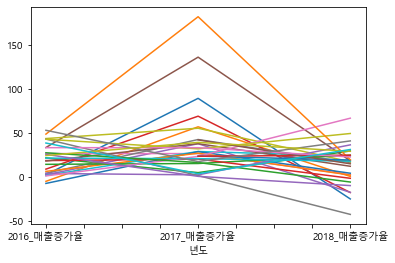

In [55]:
data3 = data22.transpose()
a = data22.index

for i in range(len(a)):
    data3[np.int(data22.index[i])].plot()

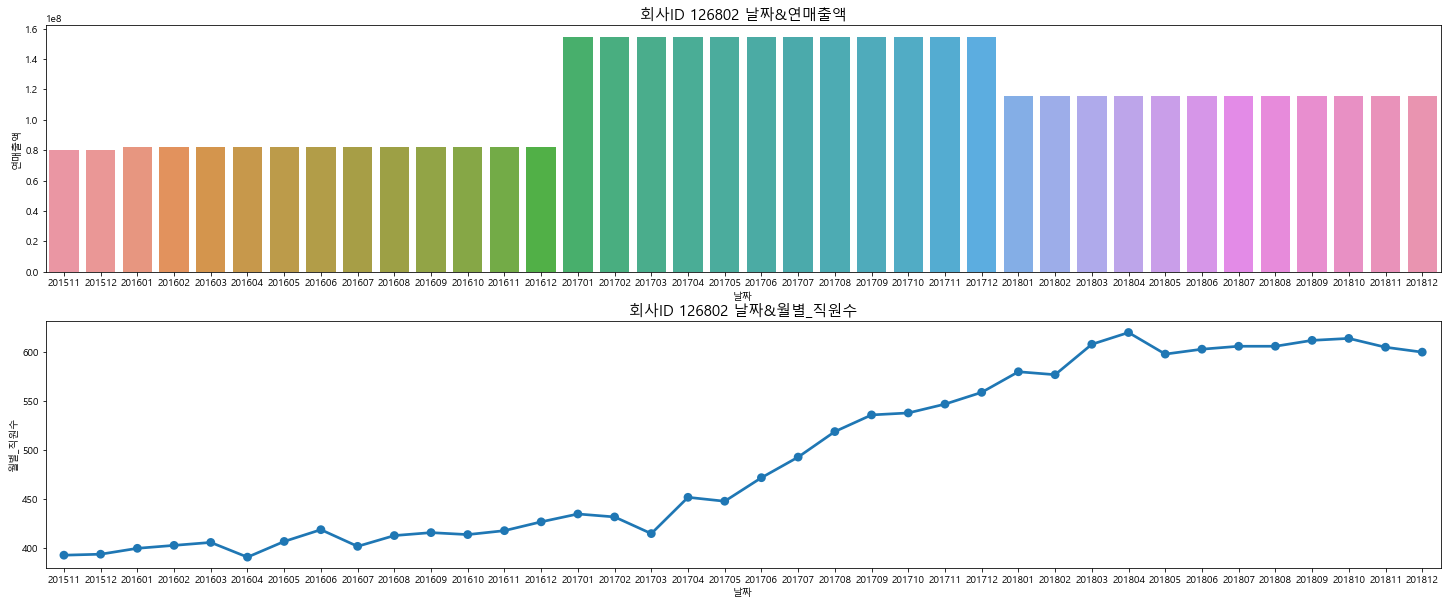

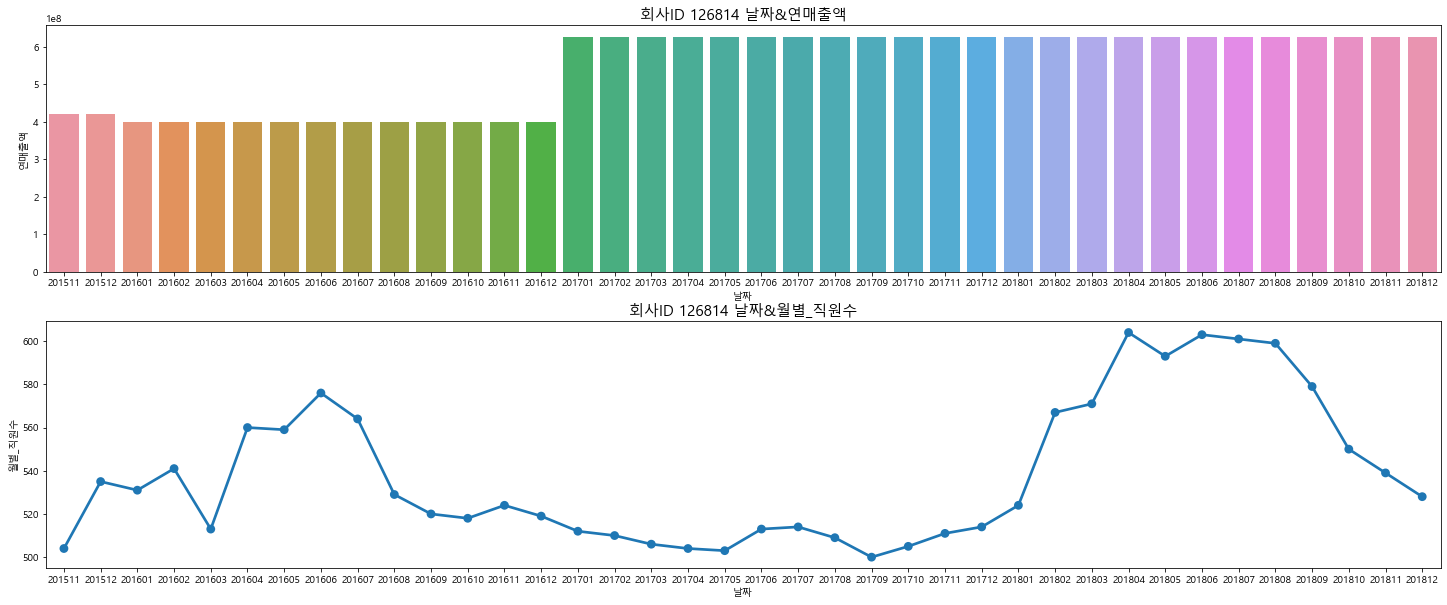

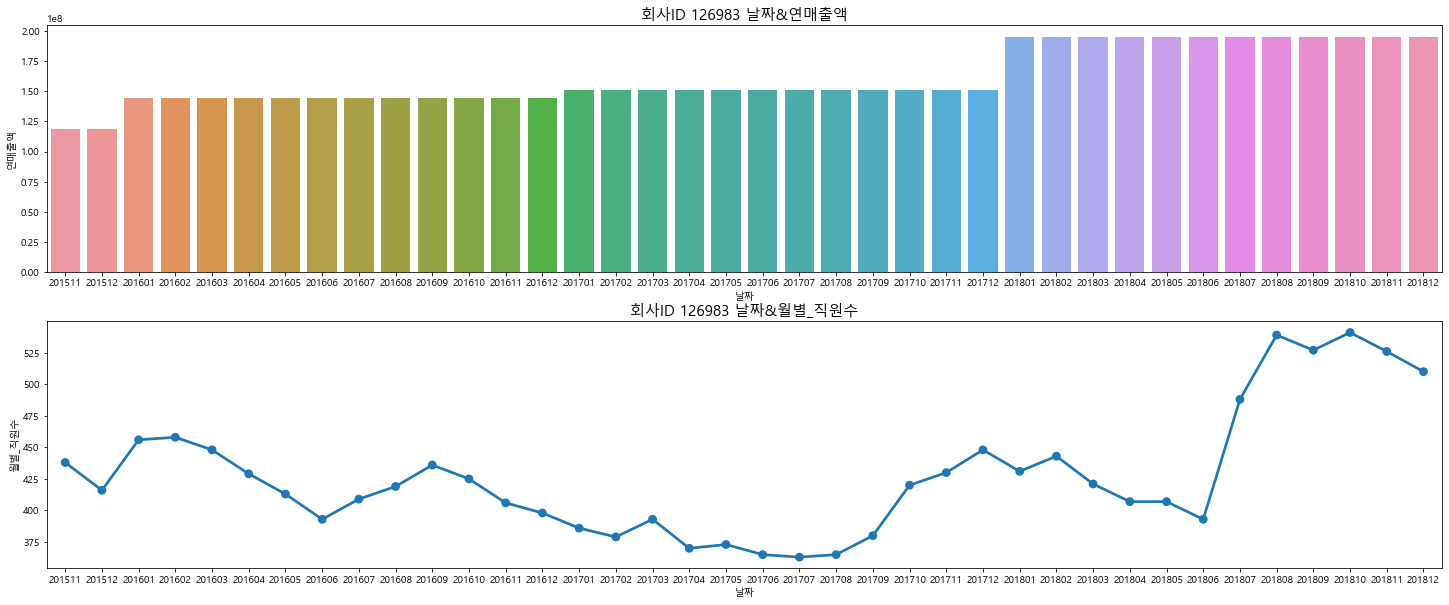

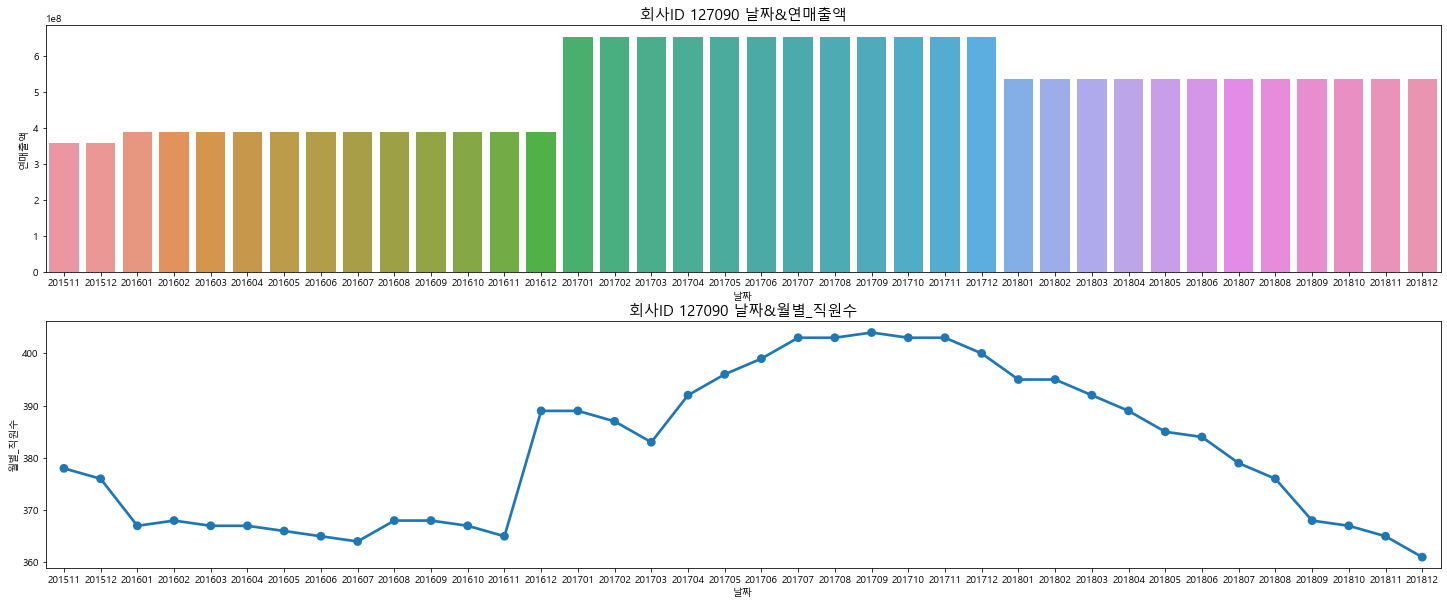

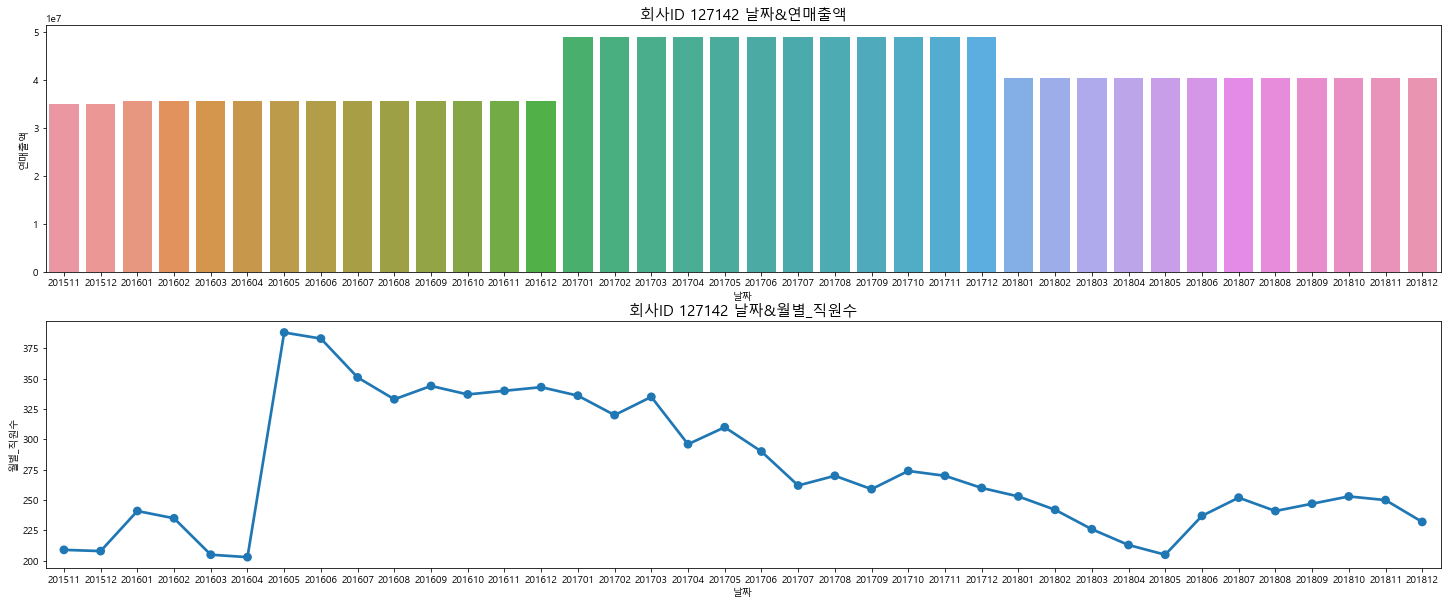

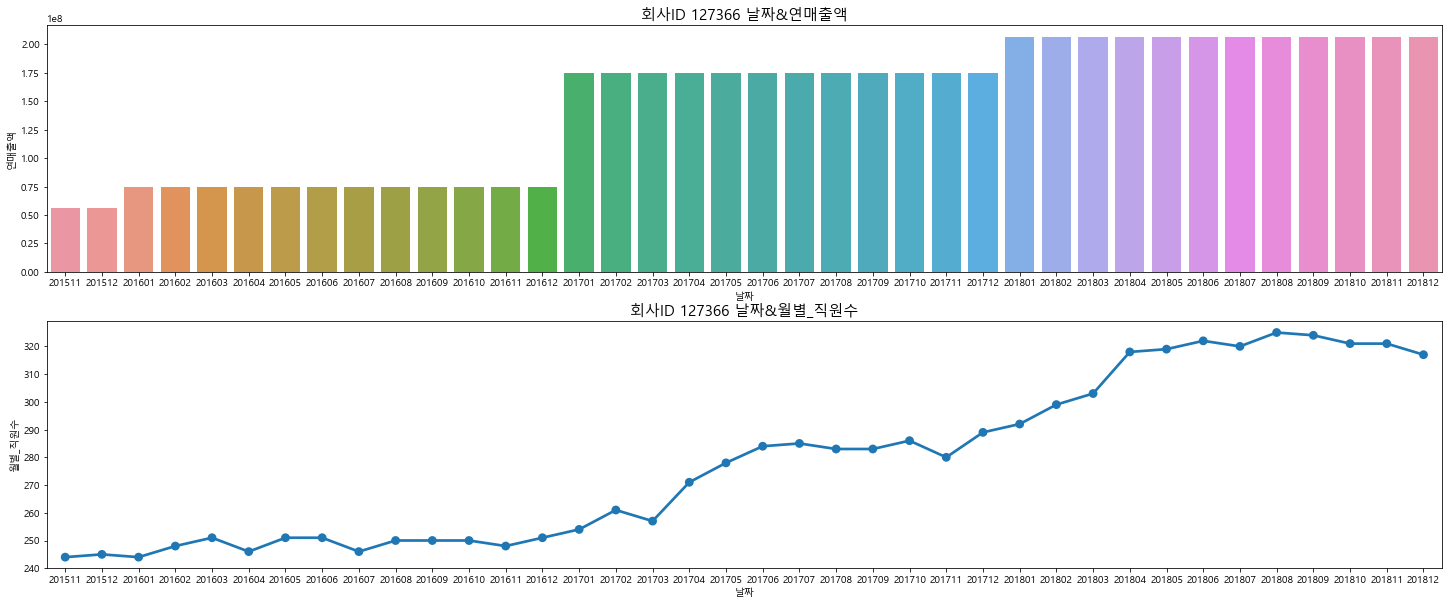

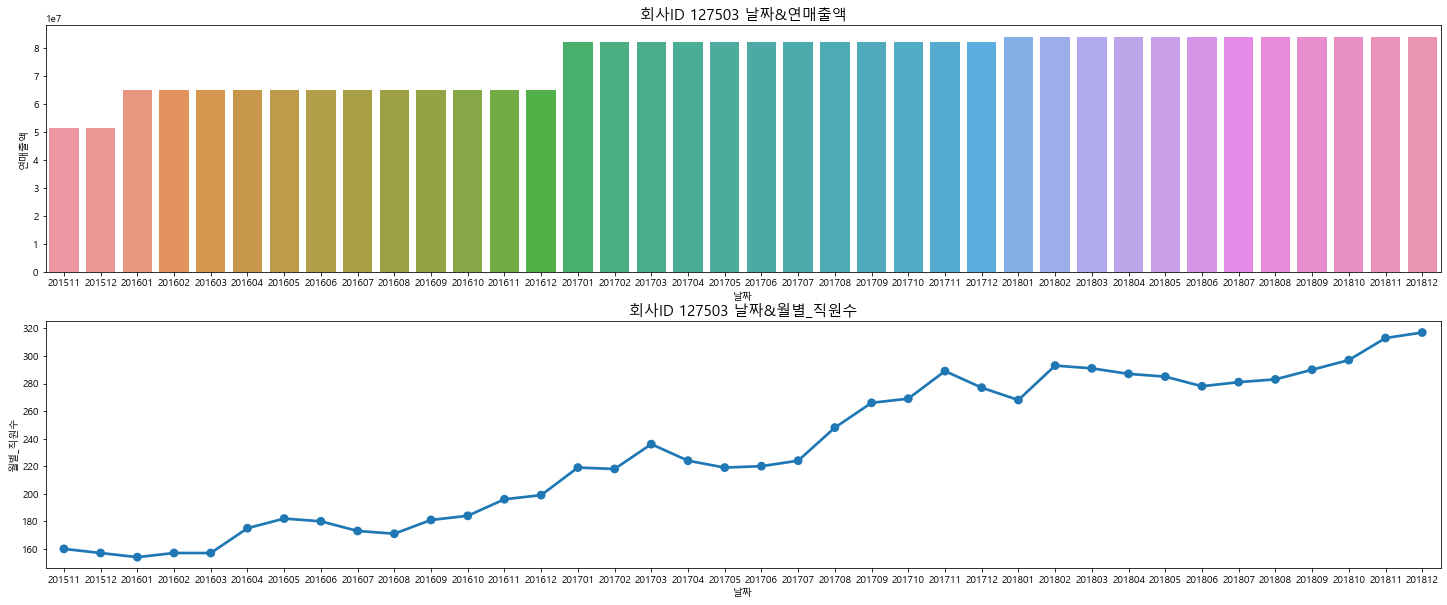

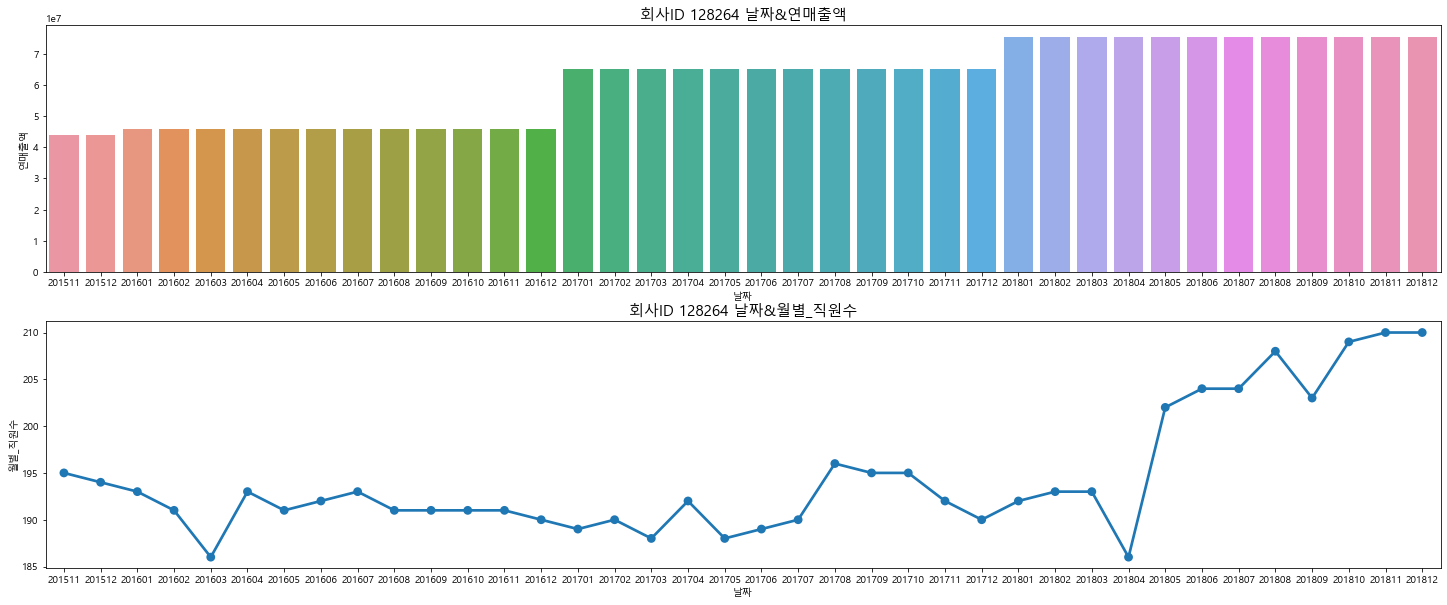

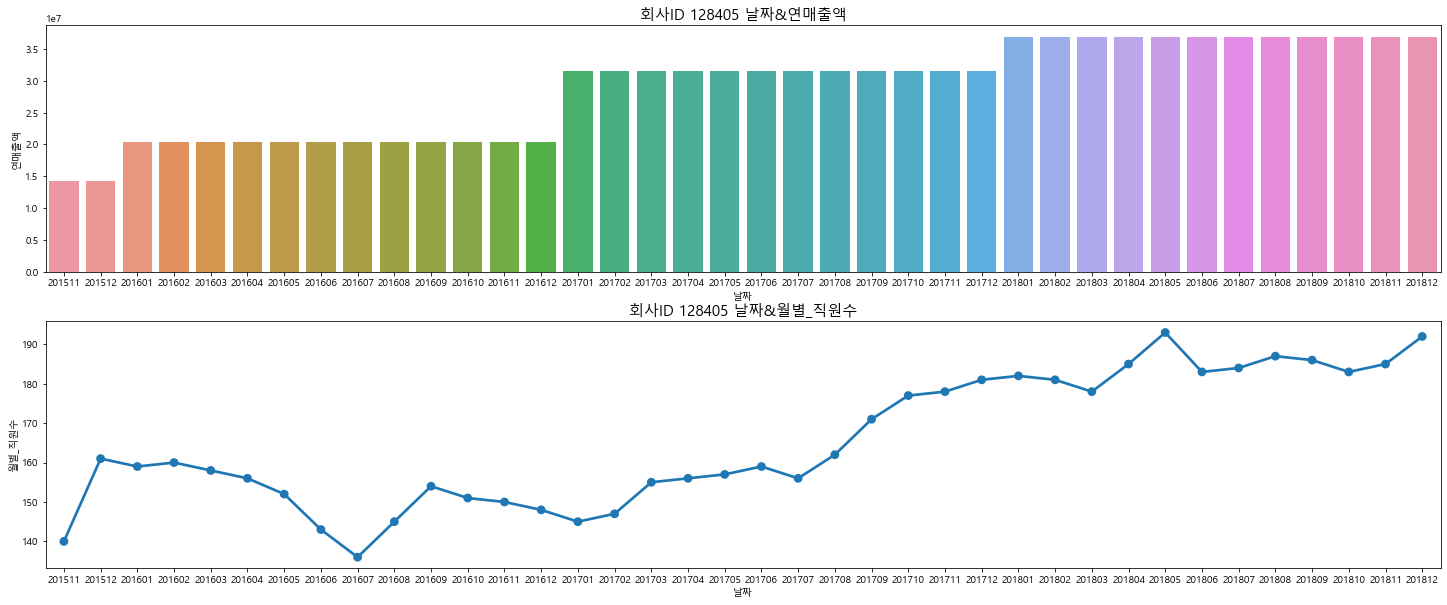

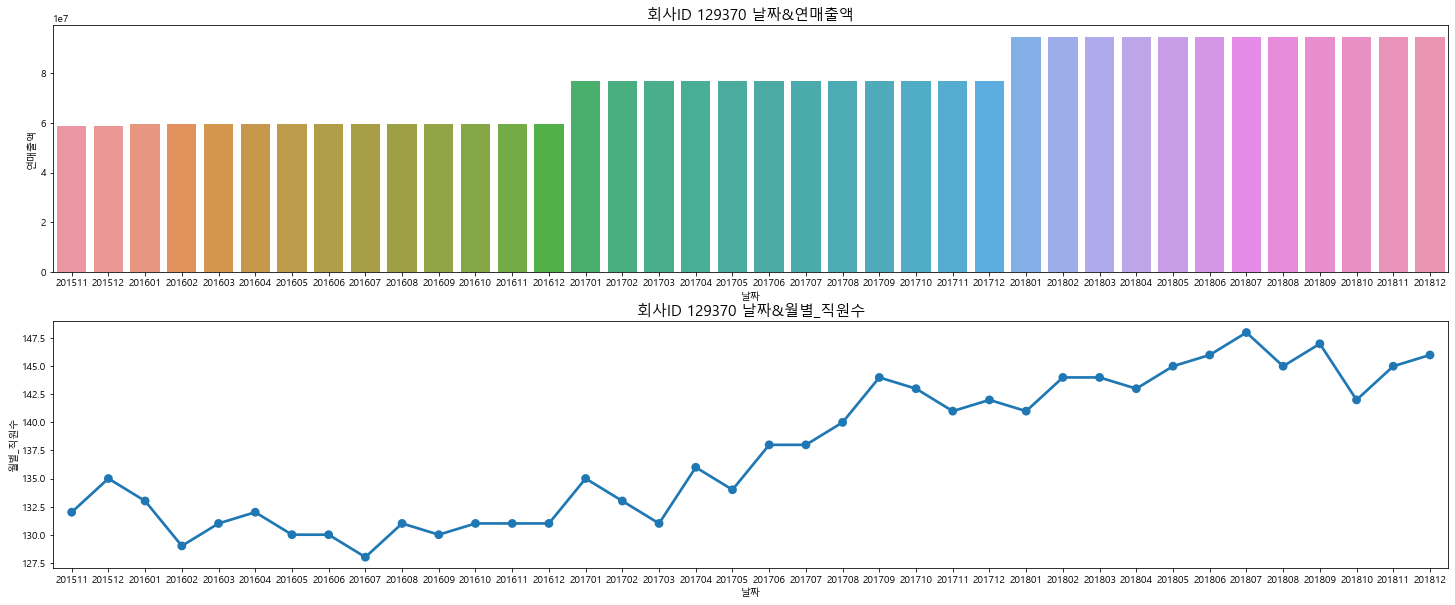

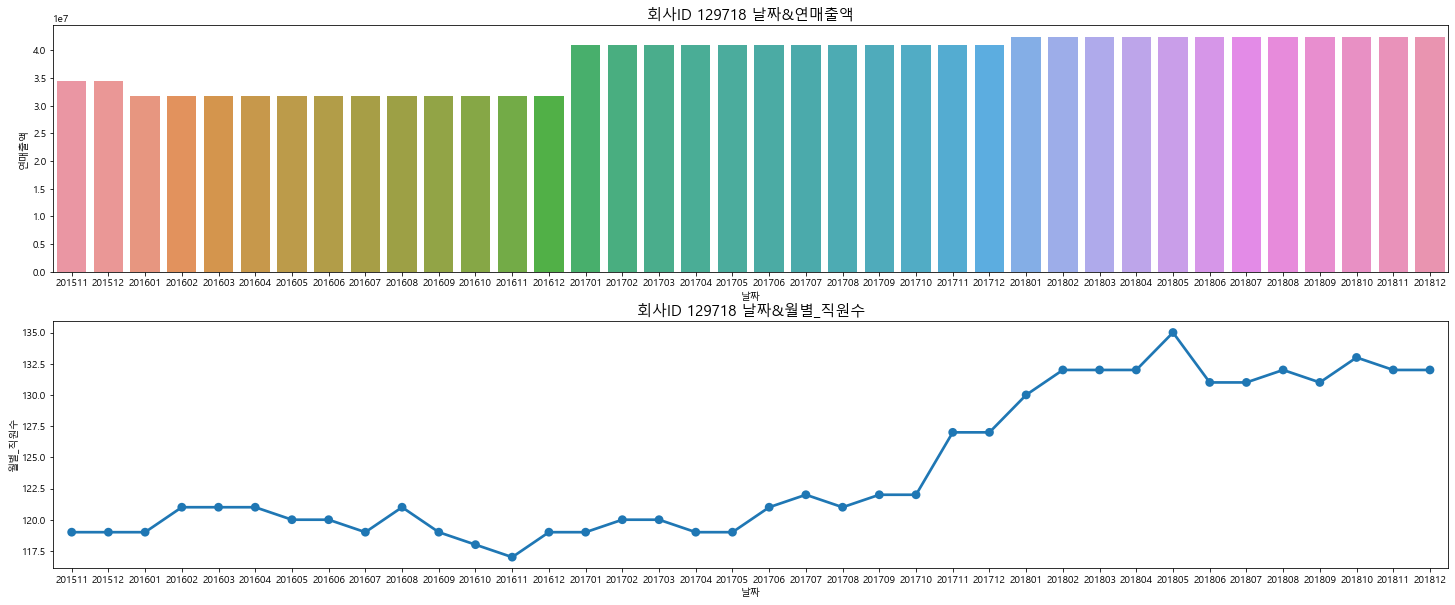

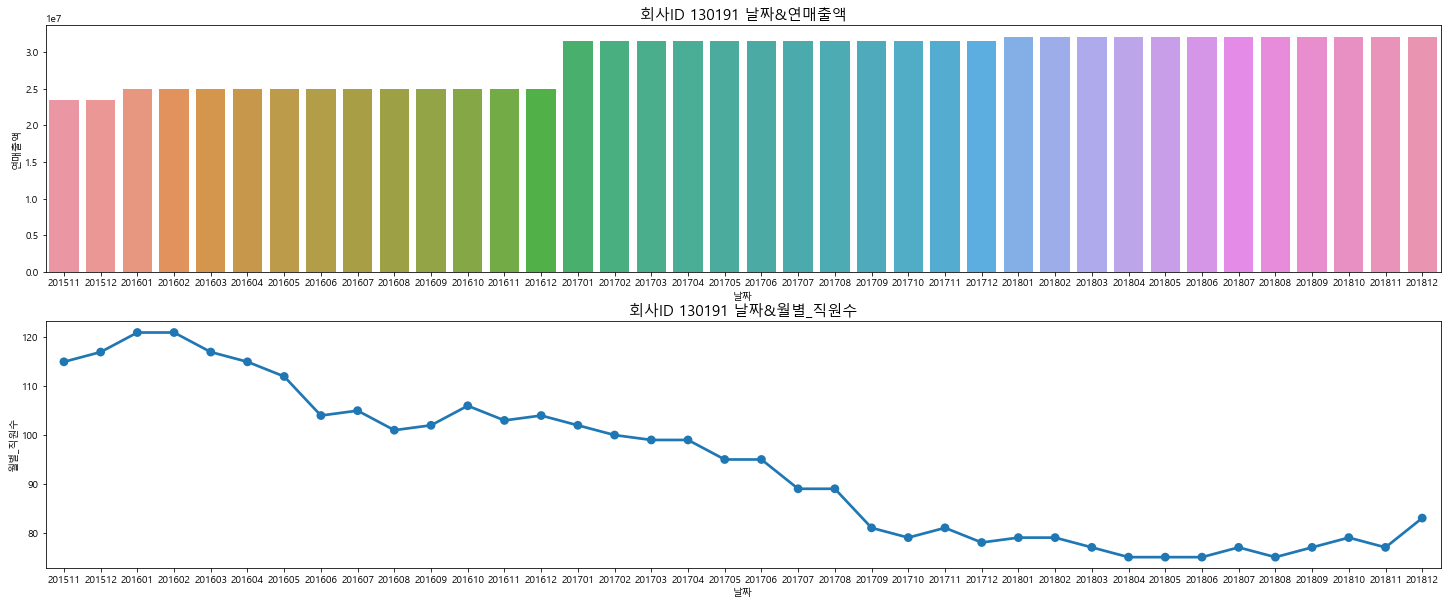

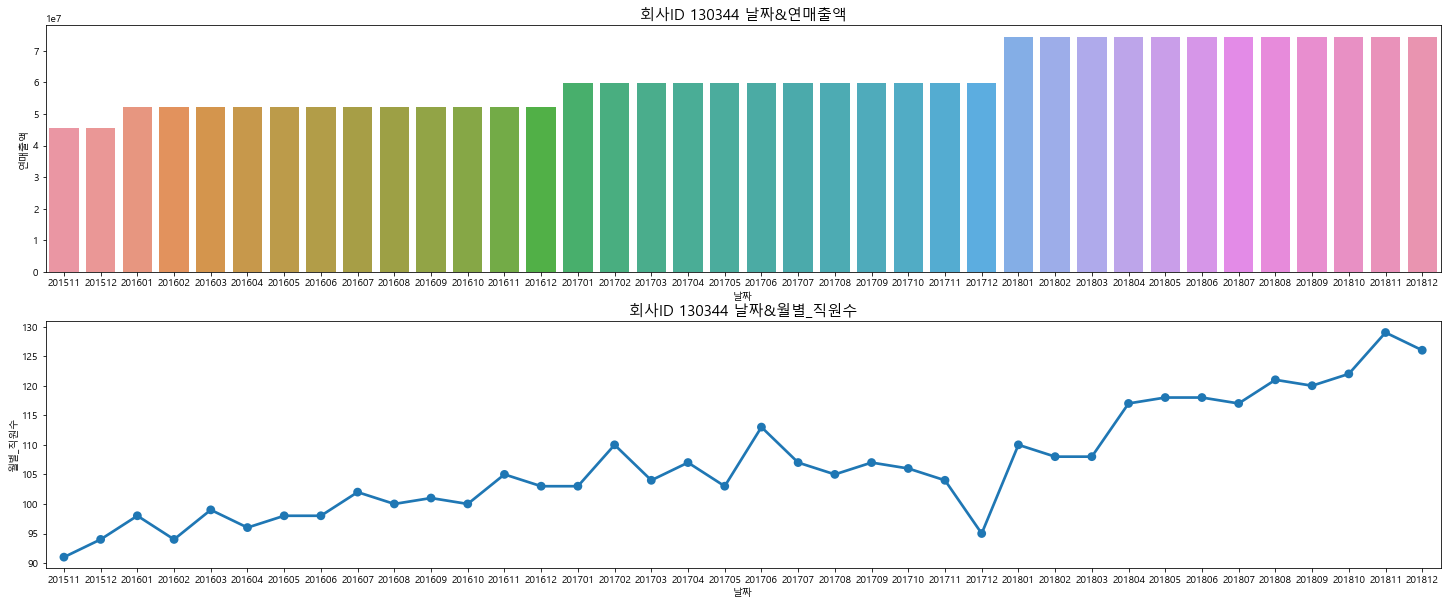

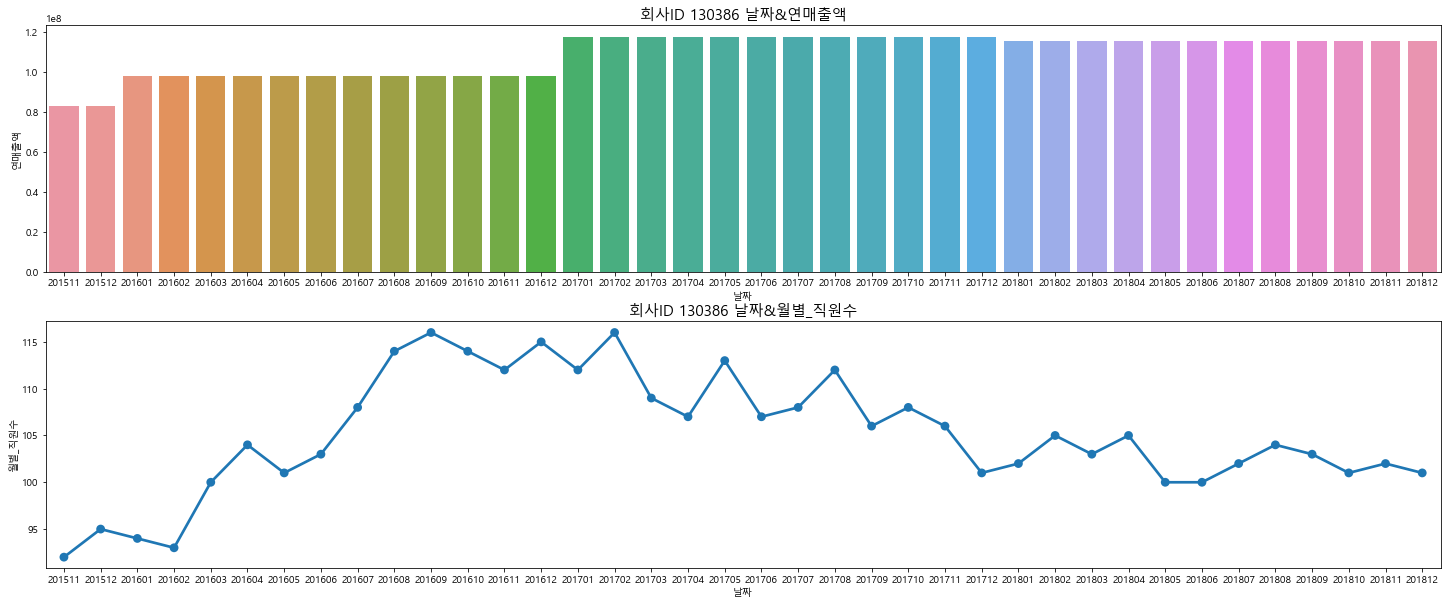

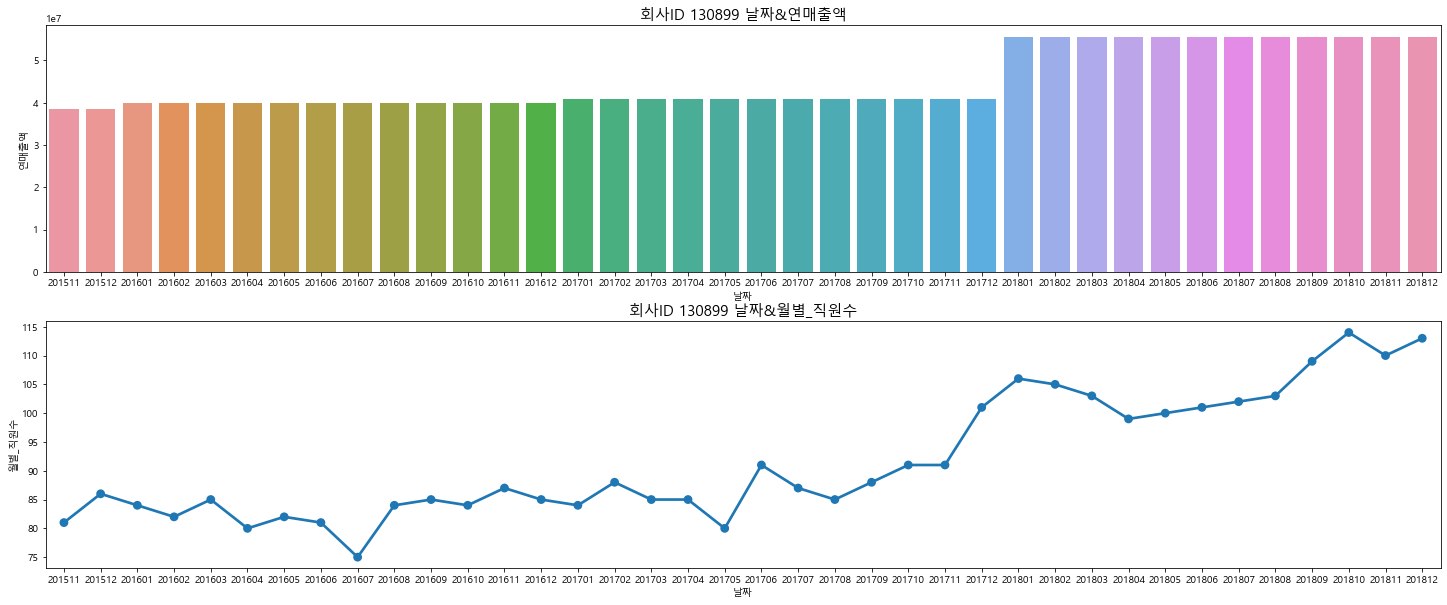

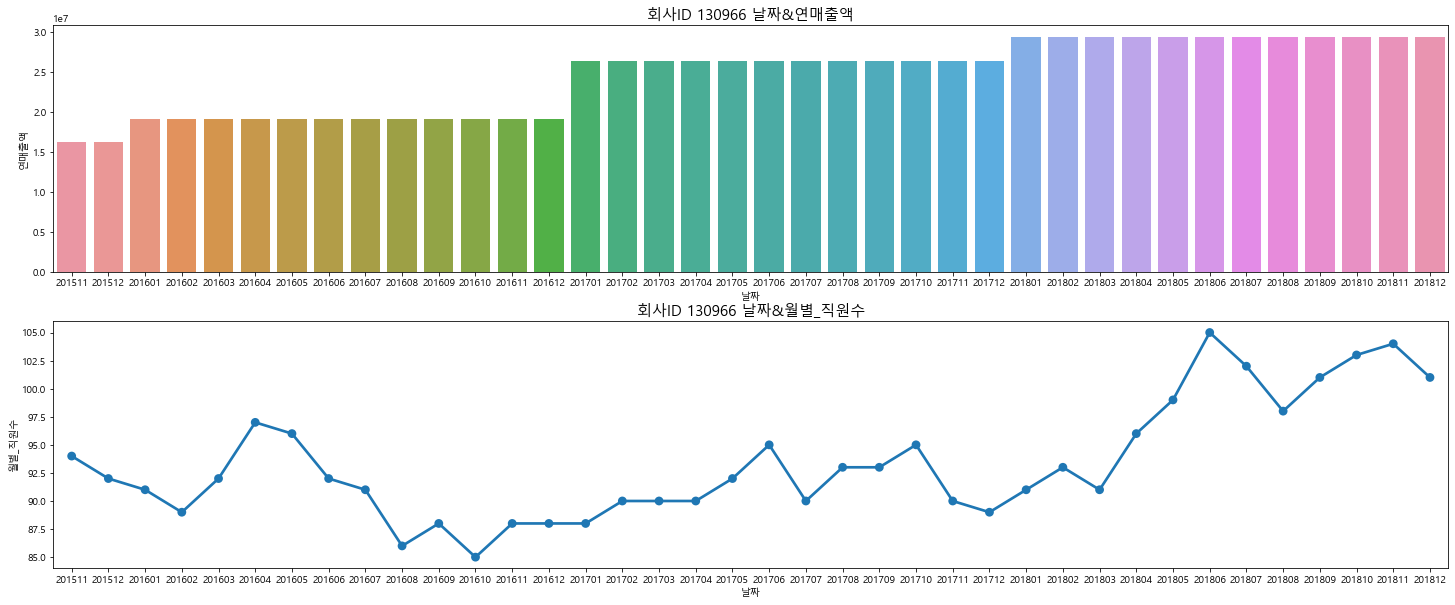

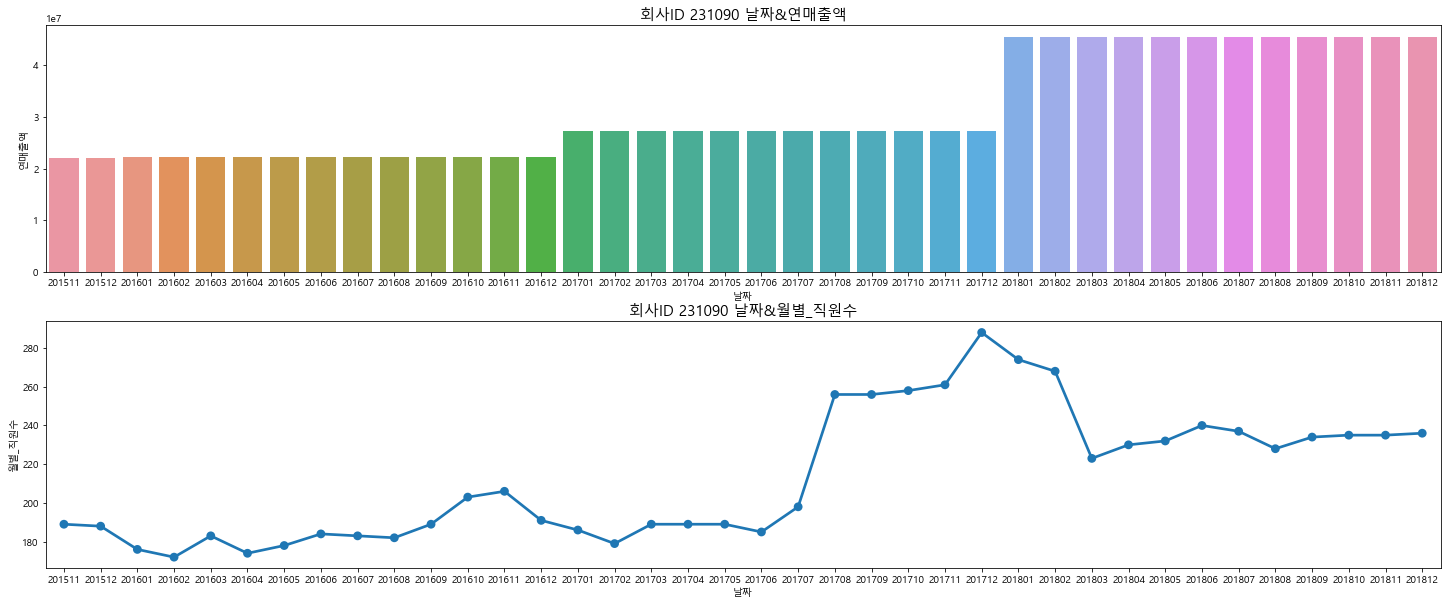

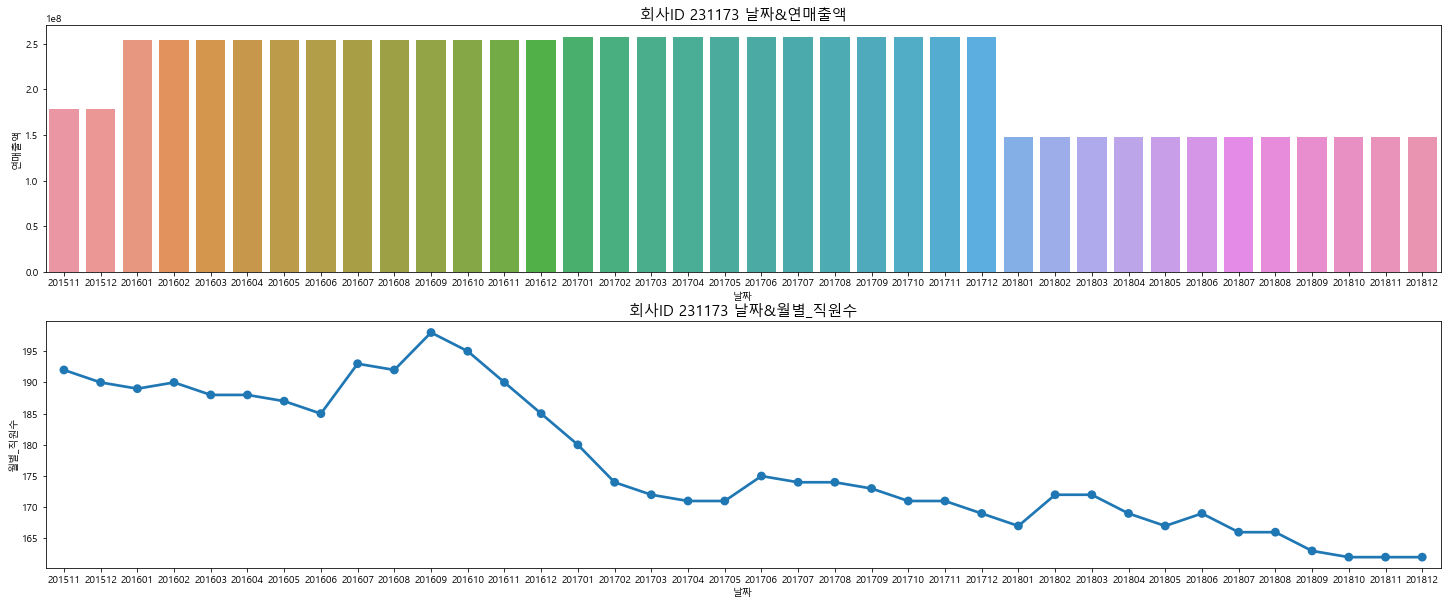

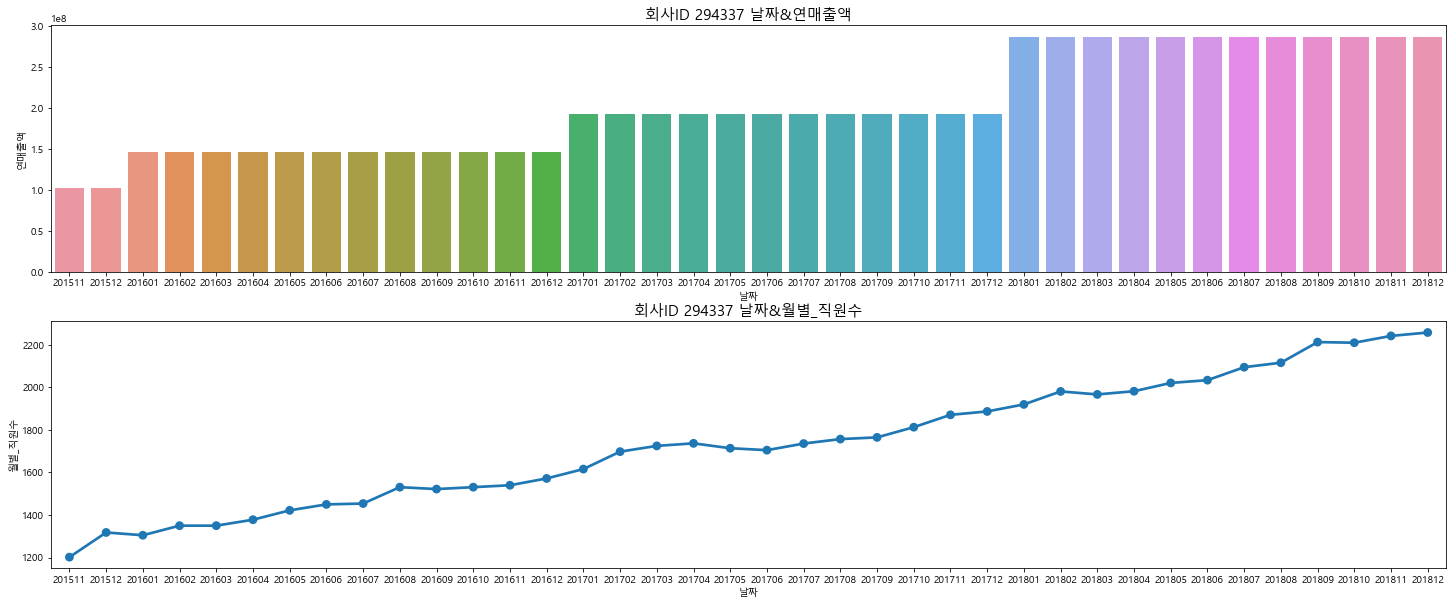

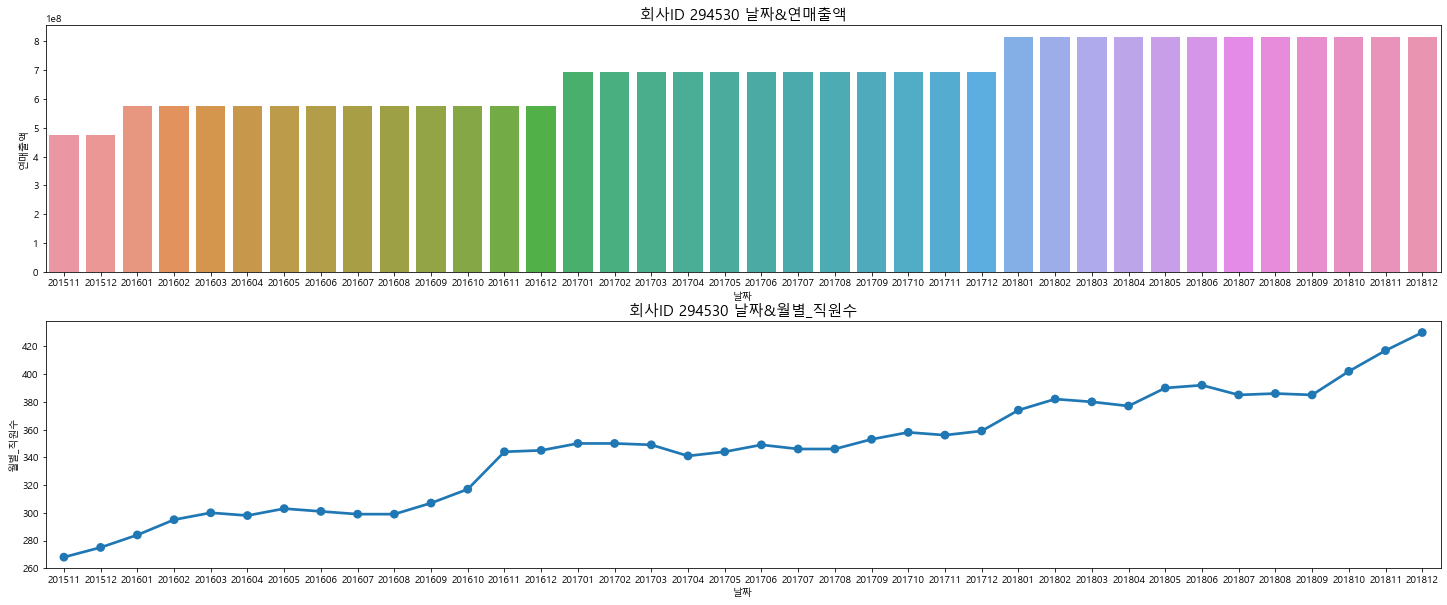

Error in callback <function flush_figures at 0x0000019691D0E430> (for post_execute):


KeyboardInterrupt: 

In [56]:
# 날짜&연매출액, 날짜&월별_직원수 변화 그래프
for i in range(len(a)):
    f, ax = plt.subplots(2, 1, figsize=(25, 10))

    sns.barplot(x='날짜', y='연매출액', data=df[df['회사ID'] == a[i]].sort_values(by=['날짜']), ax=ax[0])
    sns.pointplot(data=df[df['회사ID'] == a[i]].sort_values(by=['날짜']), x='날짜', y='월별_직원수', ax=ax[1])
    
    ax[0].set_title("회사ID %s 날짜&연매출액" %a[i], fontsize = 15)
    ax[1].set_title("회사ID %s 날짜&월별_직원수" %a[i], fontsize = 15)  

### 연평균 보험금 증가율

In [151]:
df_25.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜,월별_월급총합,월별_월급평균
3757,403462,125610912,2015,11,134205640,385,201511,1.491174e+09,3873178.644
6157,403462,133208061,2016,12,139864660,390,201612,1.554052e+09,3984748.148
9052,403462,133208061,2016,10,142539620,397,201610,1.583774e+09,3989354.044
10782,403462,157122353,2018,11,154291940,383,201811,1.714355e+09,4476122.425
10994,403462,157122353,2018,2,153363940,402,201802,1.704044e+09,4238914.870


In [154]:
# 회사&년도별 월별_연금보험료 평균값 계산
df_보험 = df_25.groupby(['회사ID','년도'])['월별_연금보험료'].mean().unstack()
df_보험.head()

년도,2015,2016,2017,2018,2019
회사ID,,,,,
126516,589243890.0,5.874247e+08,5.166528e+08,NaN,NaN
126521,514648740.0,5.335487e+08,5.289637e+08,5.365759e+08,NaN
126538,346203600.0,3.653338e+08,4.130208e+08,4.206897e+08,NaN
126606,333420700.0,3.316568e+08,3.424213e+08,3.554639e+08,NaN
126664,225218380.0,2.375947e+08,2.580681e+08,2.772020e+08,NaN


#### Null data 처리

In [155]:
# 2015, 2017년 데이터 존재o, 2016년 데이터 존재x 
df_보험[df_보험[2016].isnull() & df_보험[2015].notnull() & df_보험[2017].notnull()]

년도,2015,2016,2017,2018,2019
회사ID,,,,,


In [156]:
# new_2016, 2018년 데이터 존재o, 2017년 데이터 존재x 
df_보험[df_보험[2017].isnull() & df_보험[2016].notnull() & df_보험[2018].notnull()]

년도,2015,2016,2017,2018,2019
회사ID,,,,,
380843,NaN,1.643754e+07,NaN,1.244484e+08,NaN
403771,NaN,4.543756e+07,NaN,5.209486e+07,NaN
420147,NaN,2.843908e+07,NaN,3.469959e+07,NaN
439986,176454540.0,1.834776e+08,NaN,2.098872e+08,NaN
469556,133339290.0,1.061146e+08,NaN,1.392735e+08,NaN


In [157]:
# 2016와 2018의 평균값으로 대체
df_보험['mean17'] = (df_보험[2016] + df_보험[2018]) / 2
df_보험['new_2017'] = np.where(pd.notnull(df_보험[2017]) == True, df_보험[2017], df_보험['mean17'])

In [72]:
df_보험 = df_보험[[2015,2016,'new_2017',2018]]
df_보험

년도,2015,2016,new_2017,2018
회사ID,,,,
126516,589243890.0,5.874247e+08,5.166528e+08,NaN
126521,514648740.0,5.335487e+08,5.289637e+08,5.365759e+08
126538,346203600.0,3.653338e+08,4.130208e+08,4.206897e+08
126606,333420700.0,3.316568e+08,3.424213e+08,3.554639e+08
126664,225218380.0,2.375947e+08,2.580681e+08,2.772020e+08
...,...,...,...,...
470125,40092460.0,4.356556e+07,4.752020e+07,5.208044e+07
507086,70848470.0,2.624282e+07,2.838128e+07,2.916746e+07
510329,134253090.0,1.327435e+08,1.343537e+08,1.325359e+08


#### 보험증가율 계산

In [158]:
df_보험['2016_보험증가율'] = (df_보험[2016]-df_보험[2015])/df_보험[2015]*100
df_보험['2017_보험증가율'] = (df_보험['new_2017']-df_보험[2016])/df_보험[2016]*100
df_보험['2018_보험증가율'] = (df_보험[2018]-df_보험['new_2017'])/df_보험['new_2017']*100
df_보험 = df_보험[['2016_보험증가율','2017_보험증가율','2018_보험증가율']]
df_보험.head()

년도,2016_보험증가율,2017_보험증가율,2018_보험증가율
회사ID,,,
126516,-0.308735,-12.047831,NaN
126521,3.672400,-0.859333,1.439061
126538,5.525698,13.052992,1.856799
126606,-0.529040,3.245677,3.808934
126664,5.495238,8.616939,7.414319


#### 보험증가율이 해마다 10%이상씩 증가하는 회사

In [163]:
# 보험증가율이 해마다 10%이상 증가하는 회사
temp = df_보험[(df_보험['2016_보험증가율']>=10) & (df_보험['2017_보험증가율']>=10) & (df_보험['2018_보험증가율']>=10)]
temp.head()

년도,2016_보험증가율,2017_보험증가율,2018_보험증가율
회사ID,,,
126772,40.492703,21.580095,16.079056
127503,12.019120,39.962884,32.626415
294337,15.285721,20.579398,24.249182
294530,15.713624,21.677262,18.615249
440094,28.609162,42.228680,29.220050


In [164]:
len(temp)

5

### 최종적으로 조건을 만족하는 회사

In [167]:
# 모든 조건을 만족하는 회사
final = pd.DataFrame(set(a) & set(temp.index))
final

,0
0,294337
1,294530
2,440094
3,127503


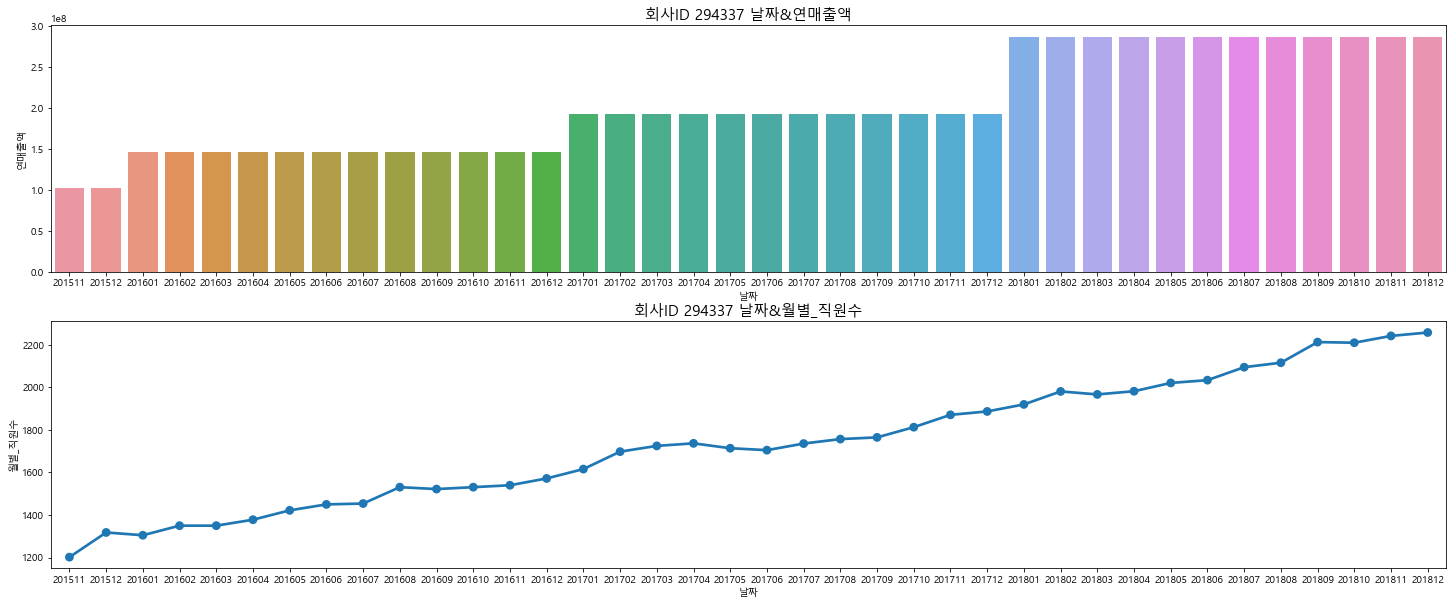

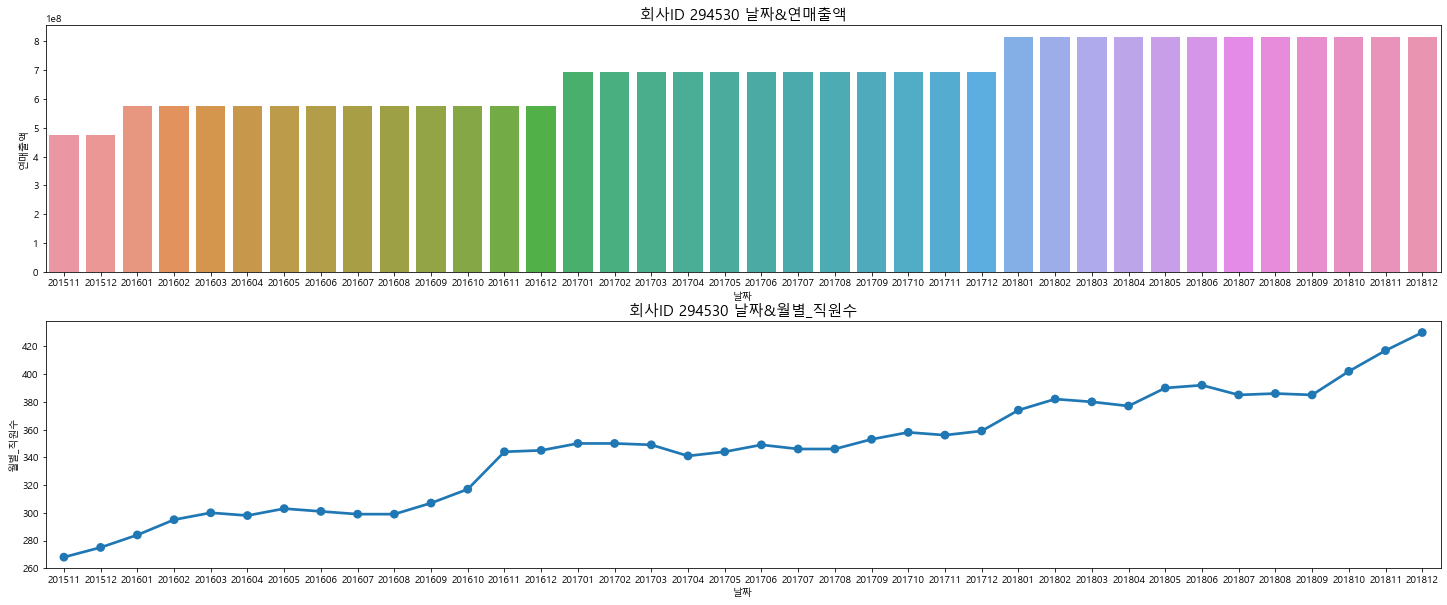

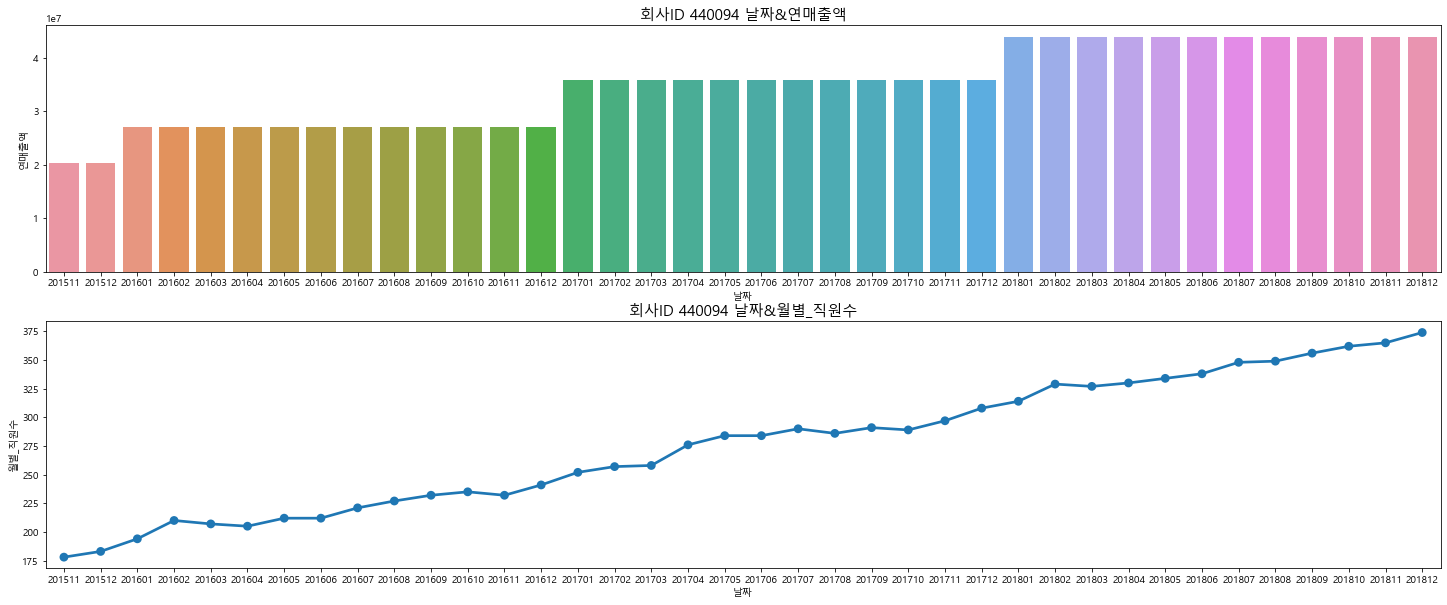

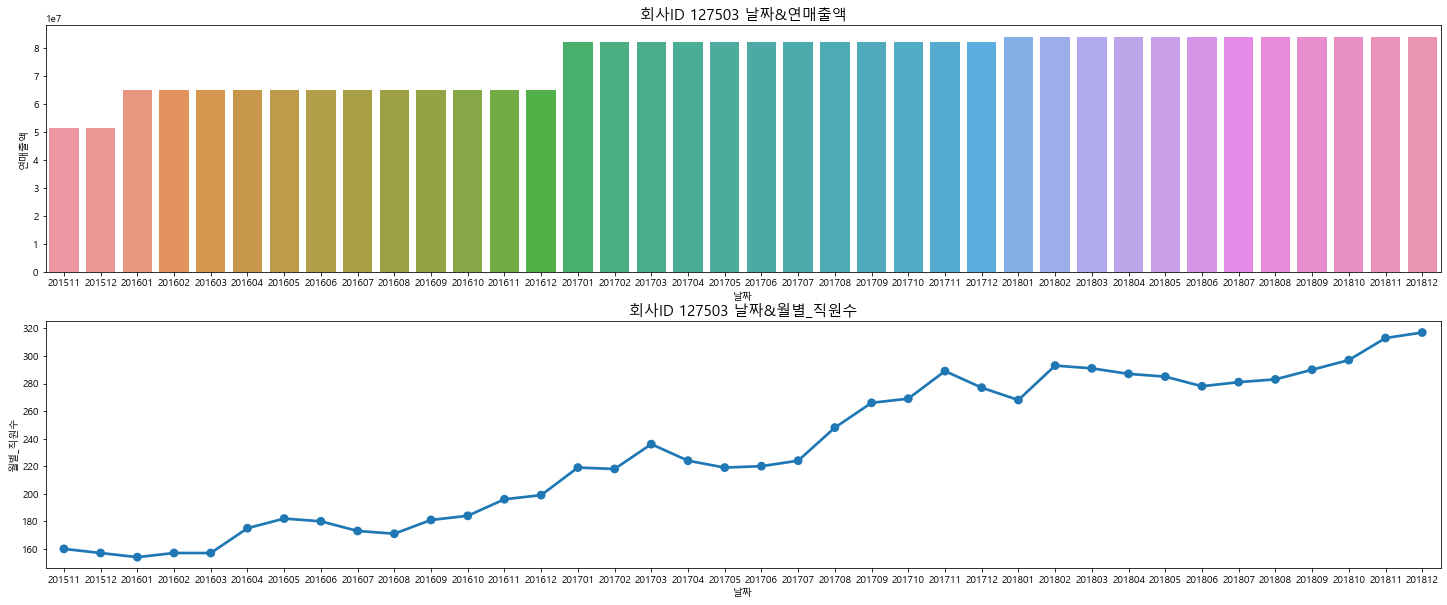

In [77]:
# 날짜&연매출액, 날짜&월별_직원수 변화 그래프
for i in range(len(final)):
    f, ax = plt.subplots(2, 1, figsize=(25, 10))

    sns.barplot(x='날짜', y='연매출액', data=df[df['회사ID'] == final.iloc[i,0]].sort_values(by=['날짜']), ax=ax[0])
    sns.pointplot(data=df[df['회사ID'] == final.iloc[i,0]].sort_values(by=['날짜']), x='날짜', y='월별_직원수', ax=ax[1])
    
    ax[0].set_title("회사ID %s 날짜&연매출액" %final.iloc[i,0], fontsize = 15)
    ax[1].set_title("회사ID %s 날짜&월별_직원수" %final.iloc[i,0], fontsize = 15)  

< 최종적으로 유니콘 기업이라고 선정한 회사 >

1. 2019년 데이터가 존재할 경우 
    - 선정한 회사 ID : 420165, 294367
        
        
2. 2019년 데이터가 존재하지 않은 경우
    - 선정한 회사 ID : 294337, 294530, 440094, 127503

## 팀원들 선정 회사

In [169]:
team = [132156,127503,130344,127669,381344,
        420165,294367,294337,294530,440094,
        127503,420165,130344,132156,132164,
        470994,268810,380843,394749,233340,472629,
        403470,420046,420165,420304,469677,
        129633,132029,135559,136290,470994]

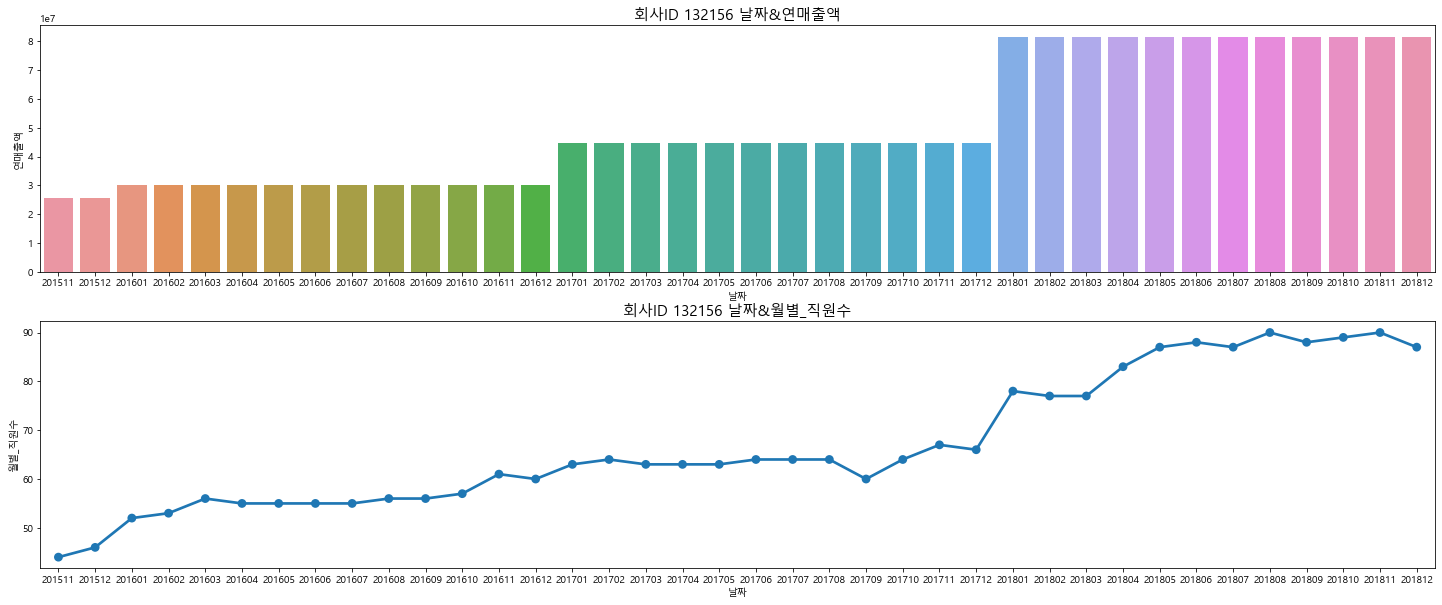

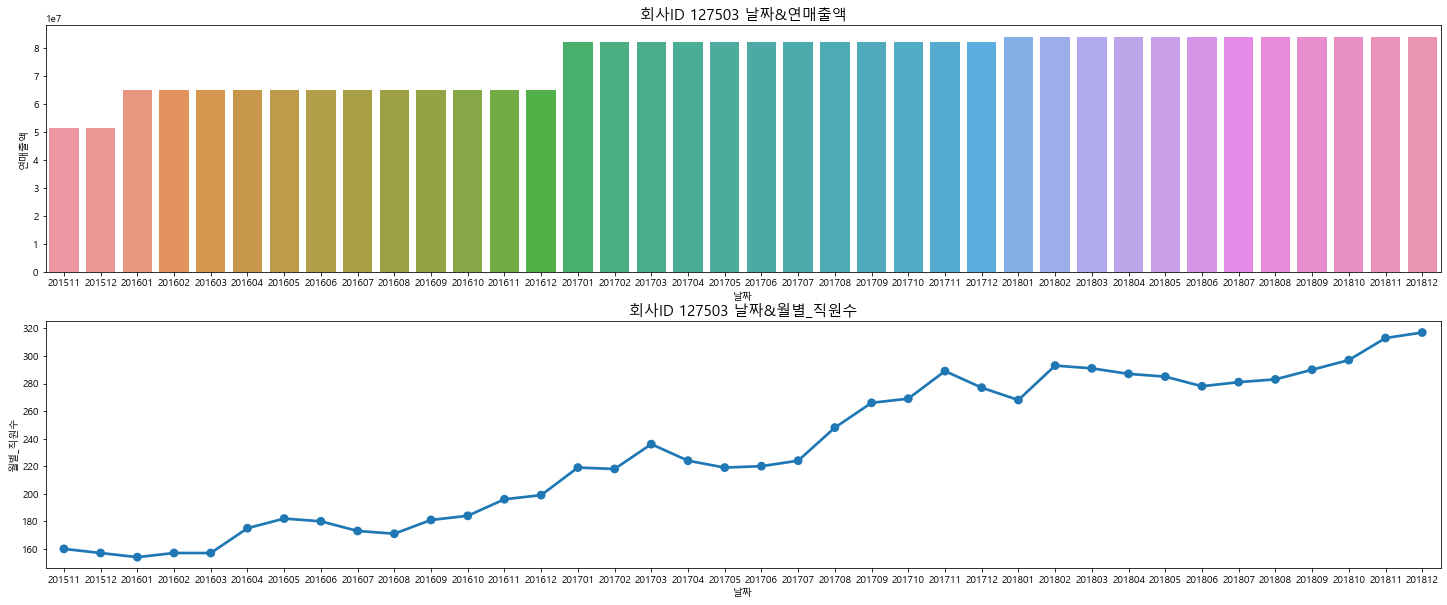

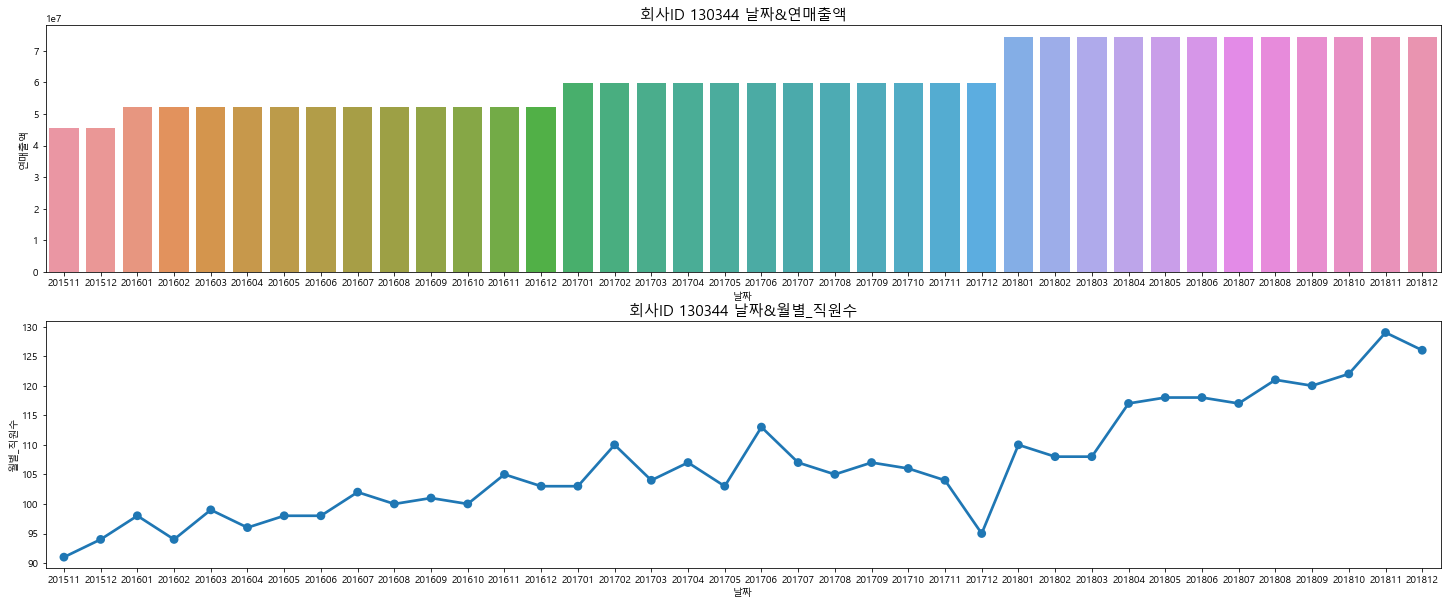

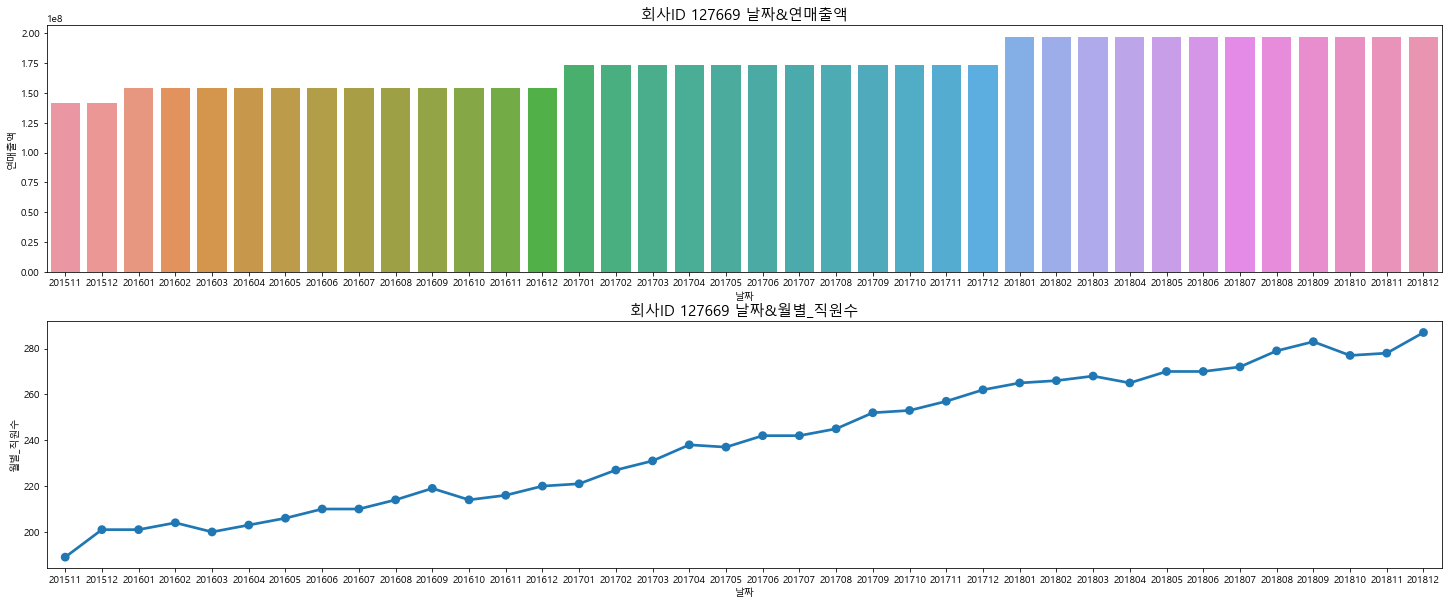

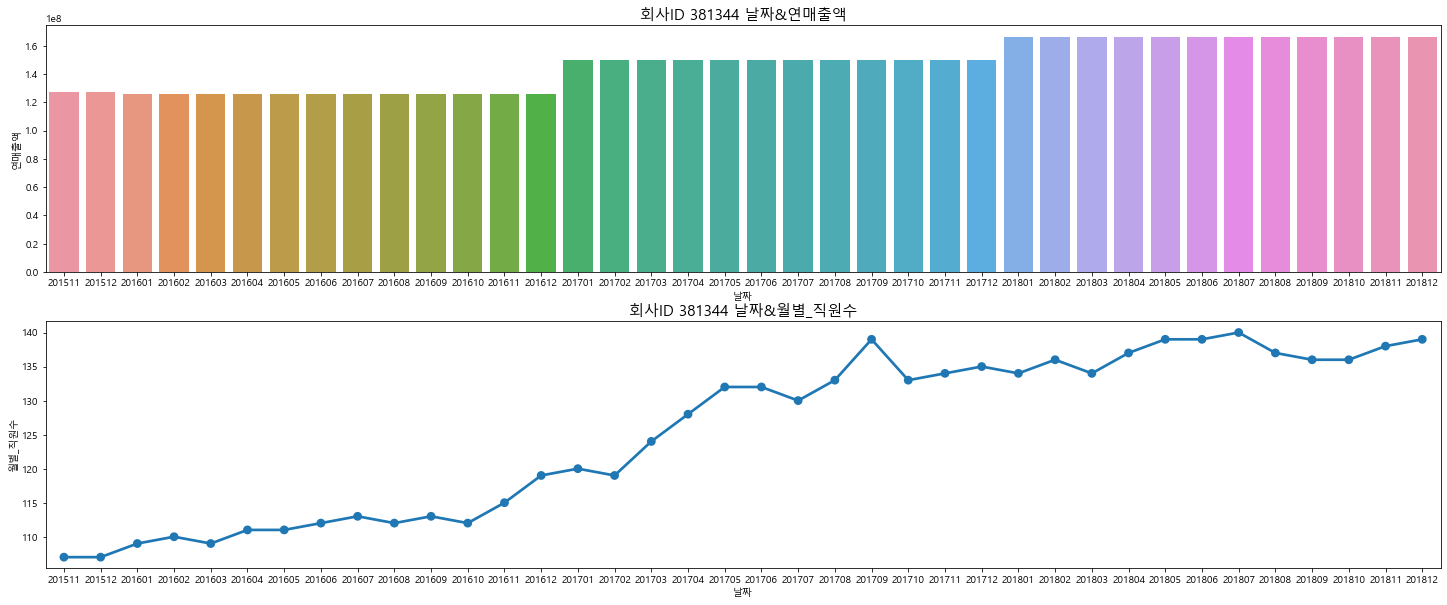

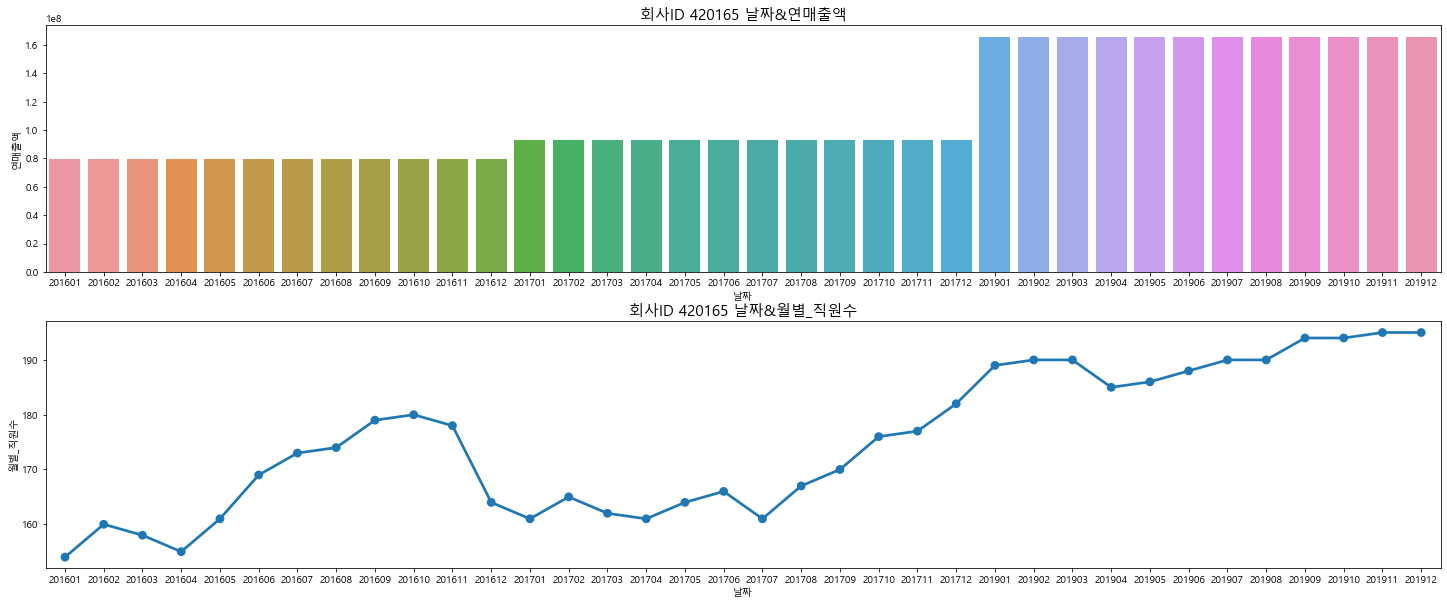

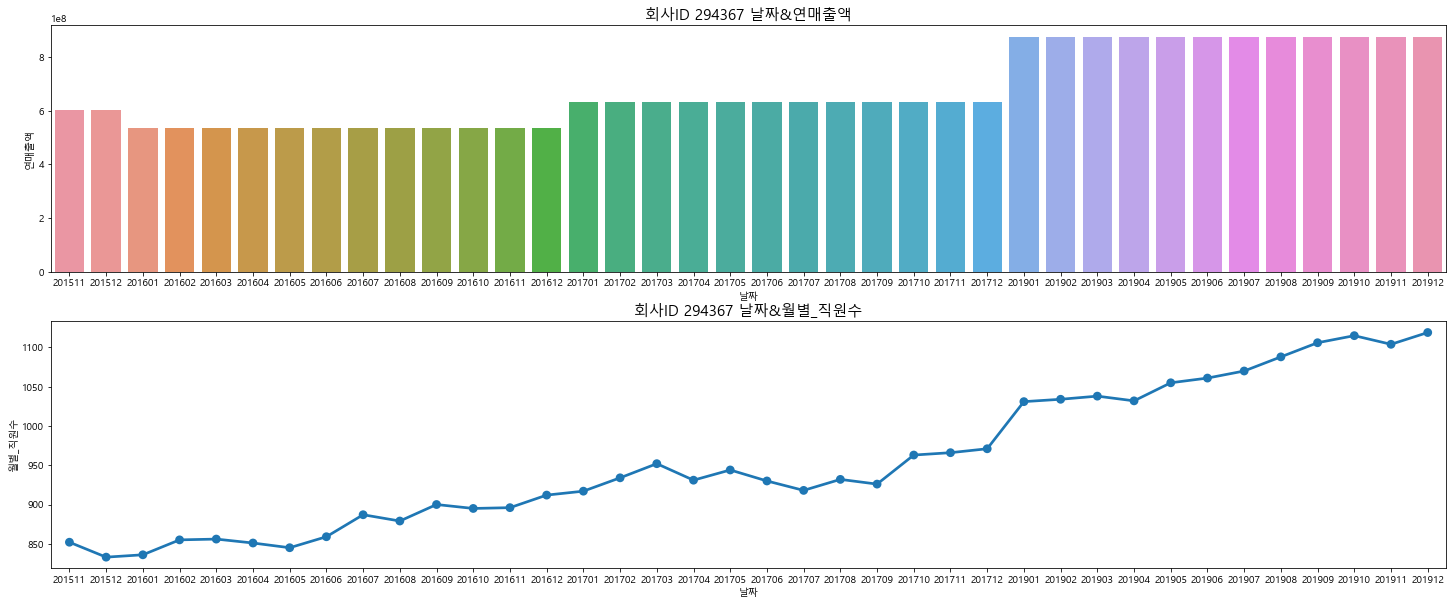

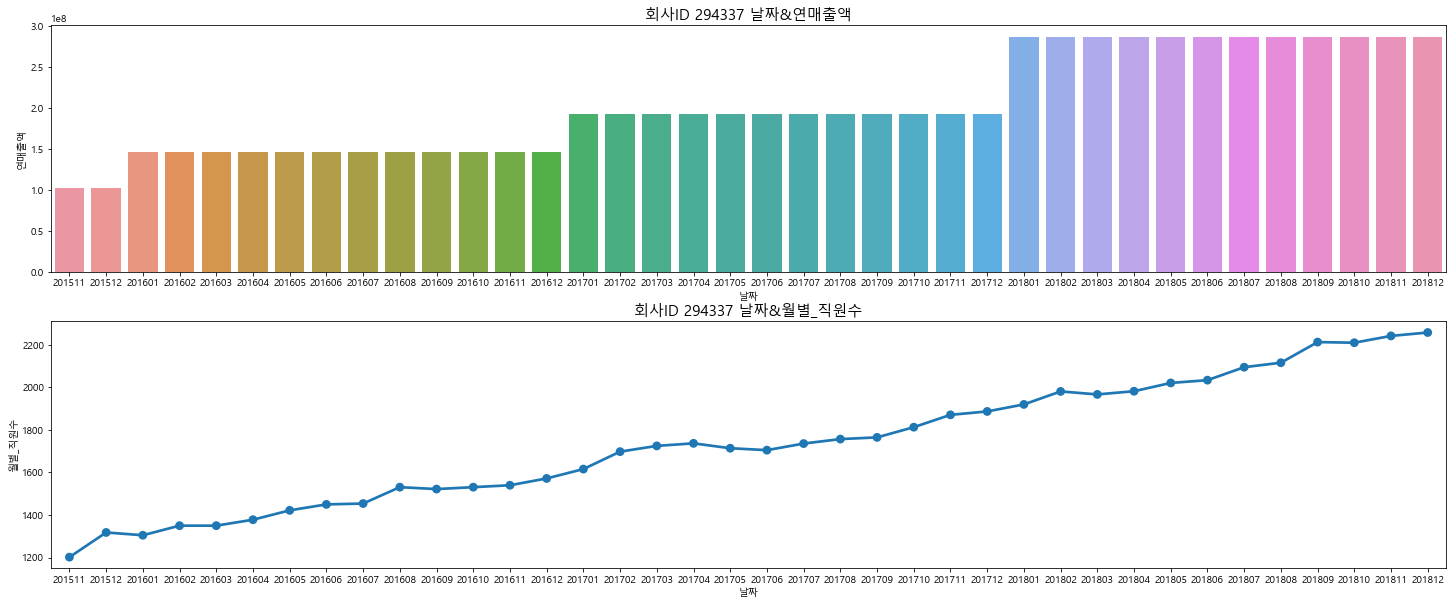

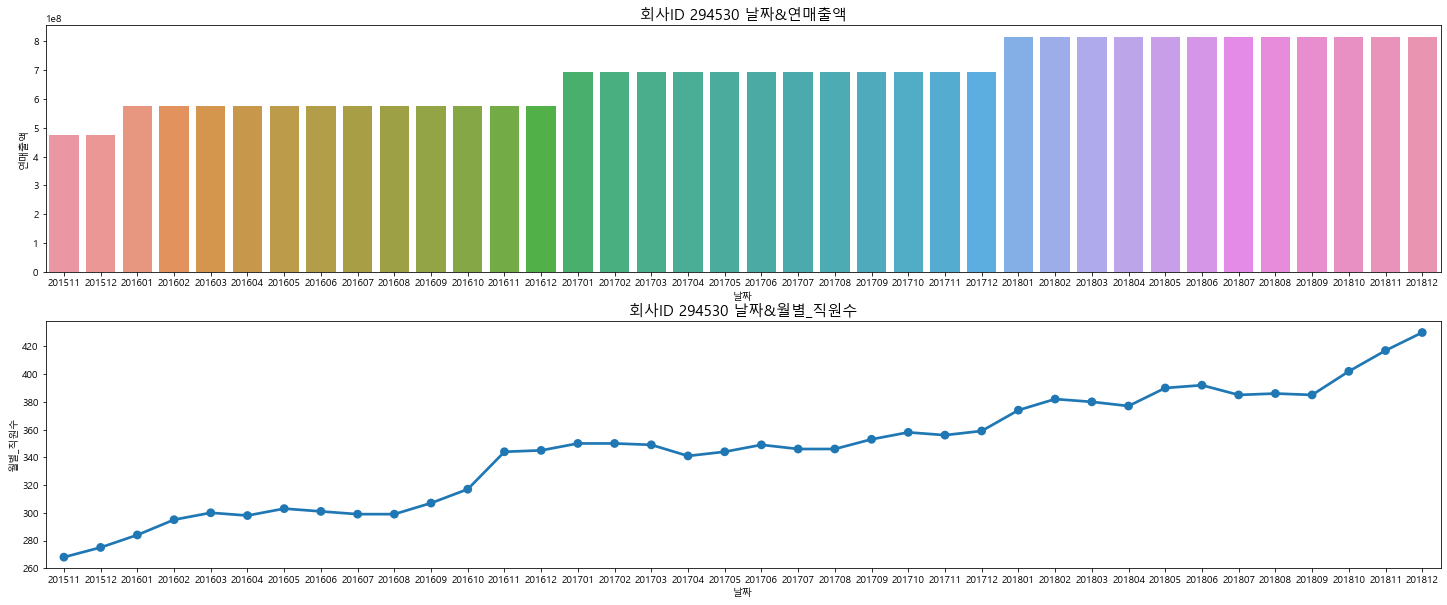

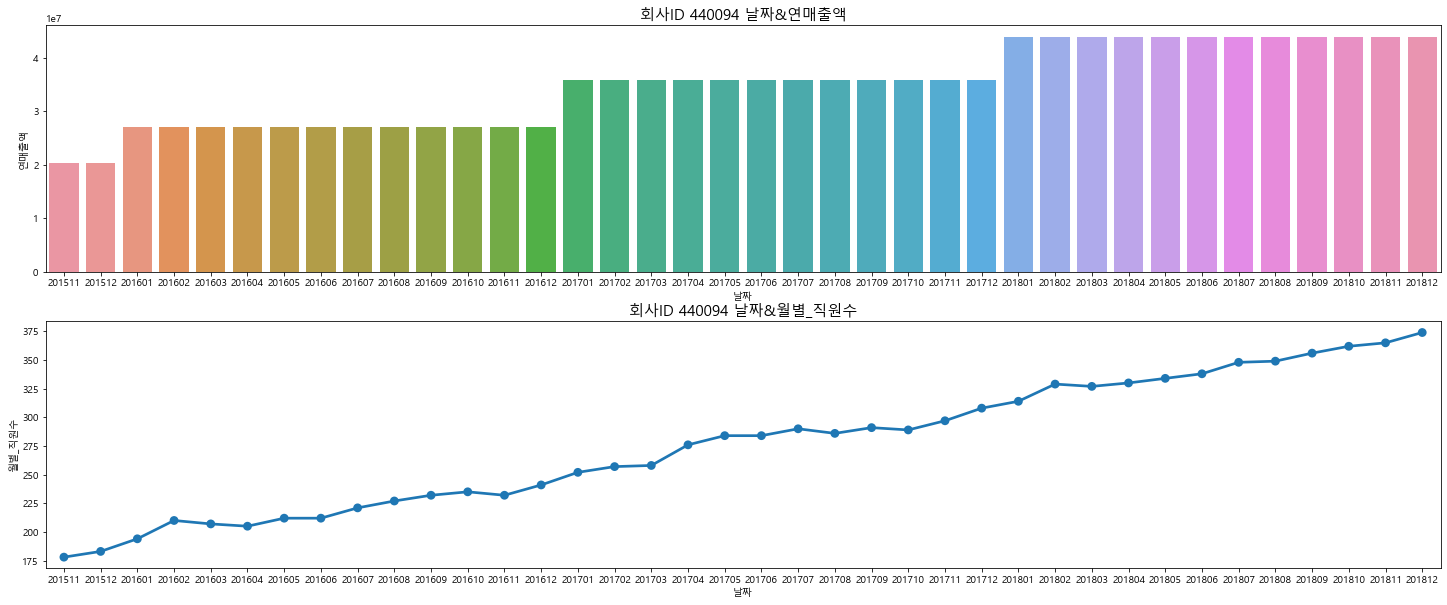

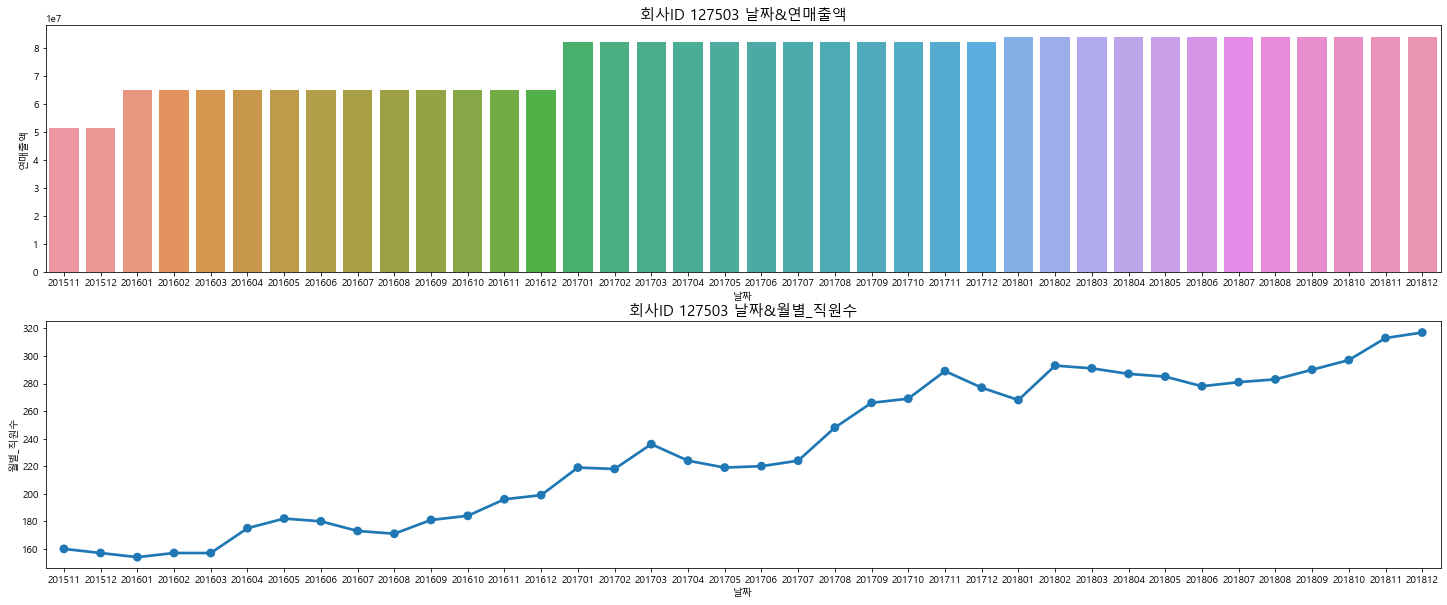

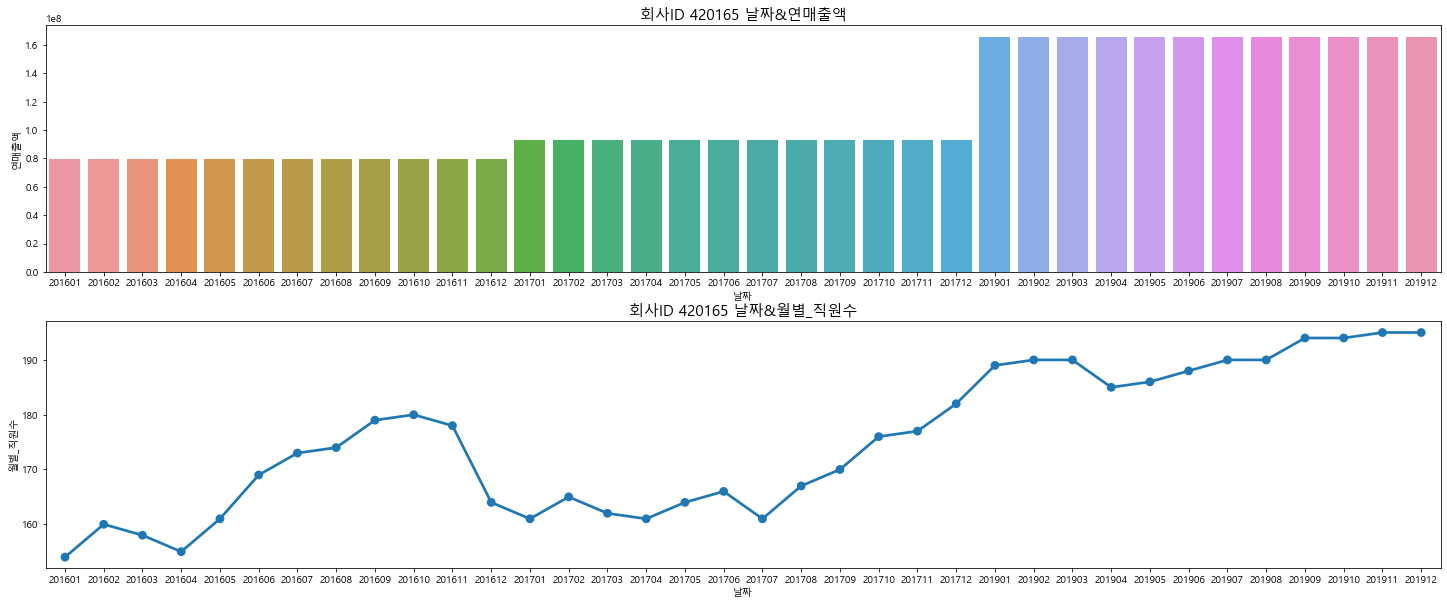

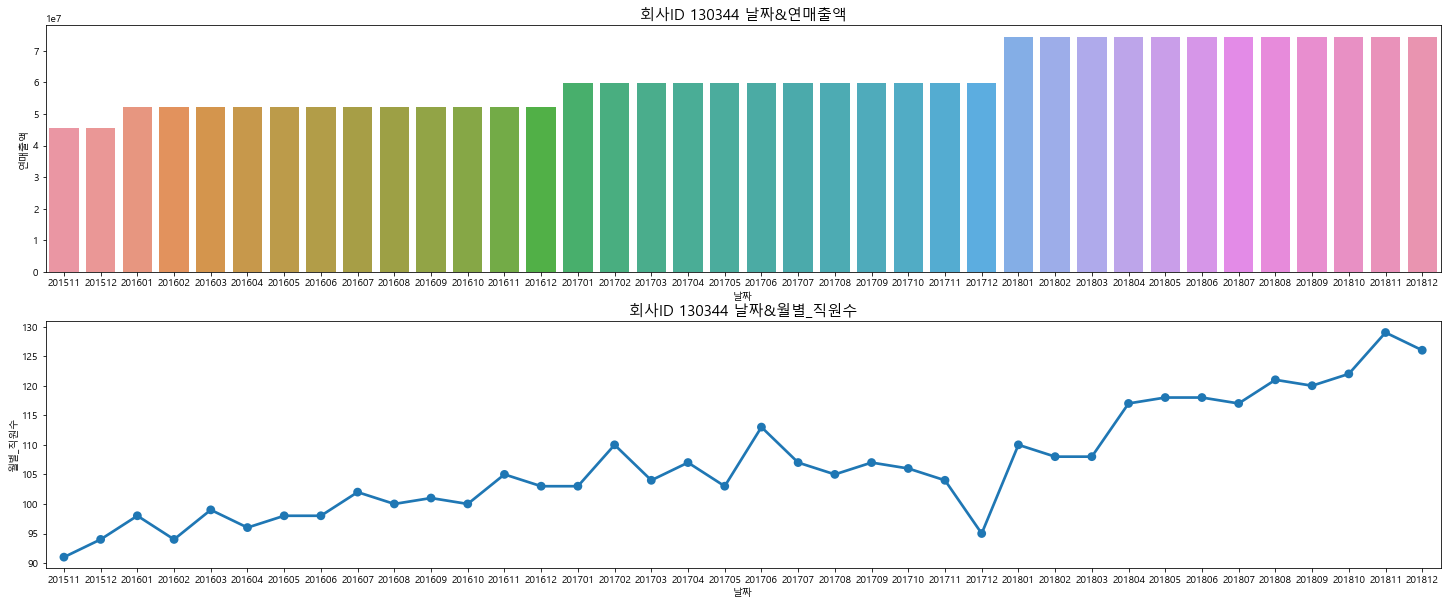

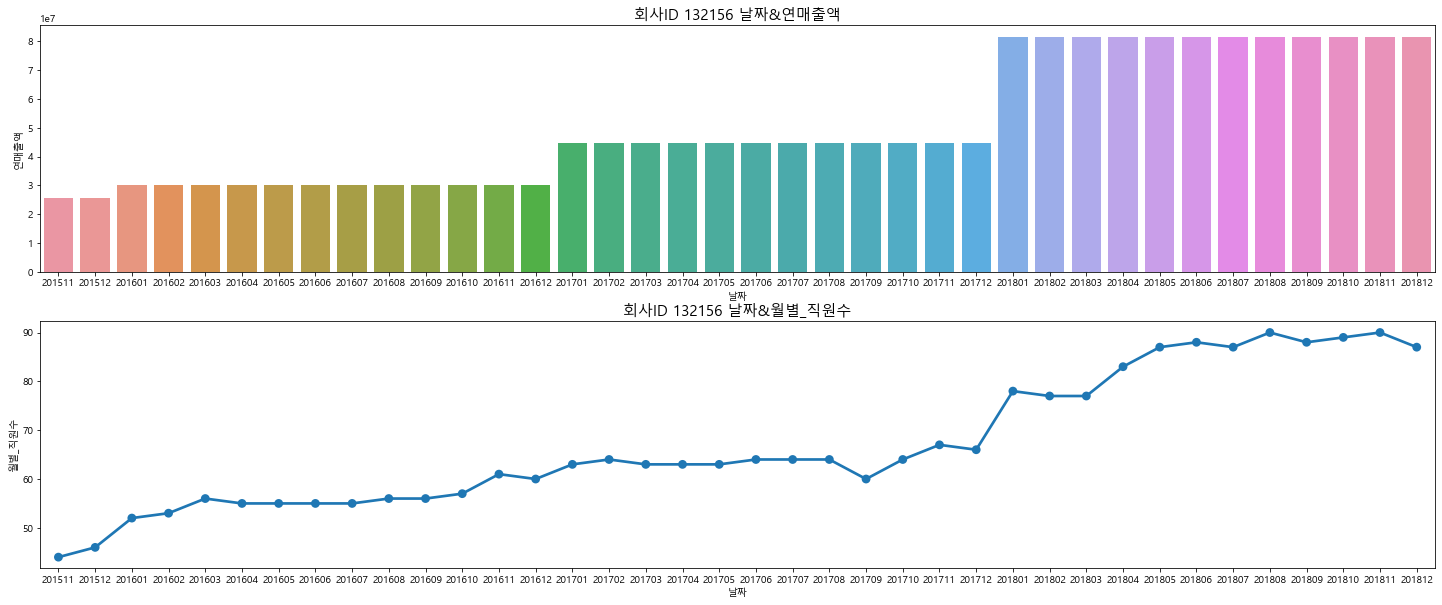

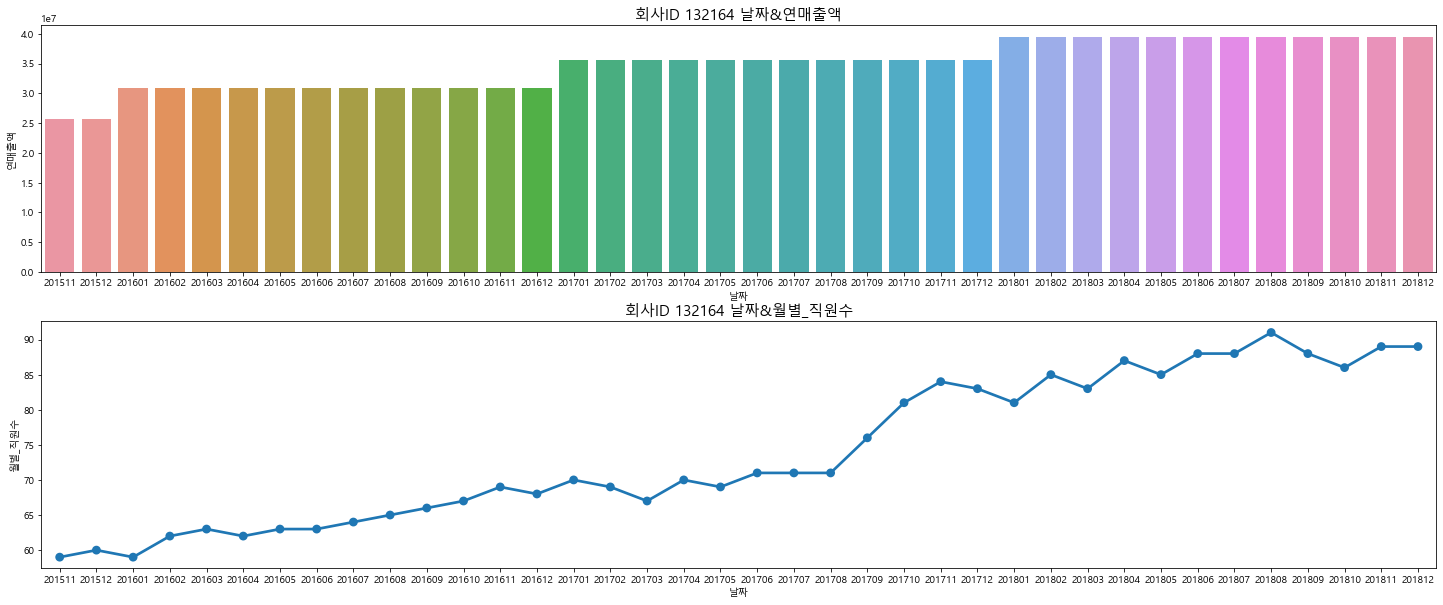

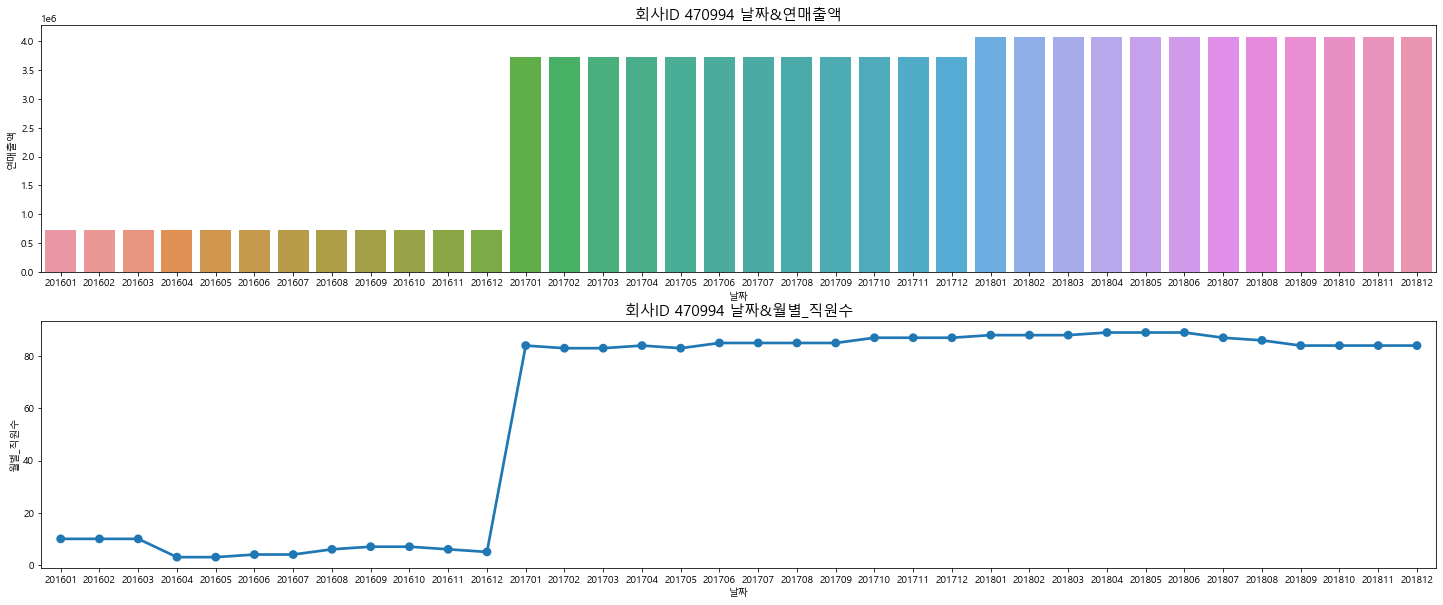

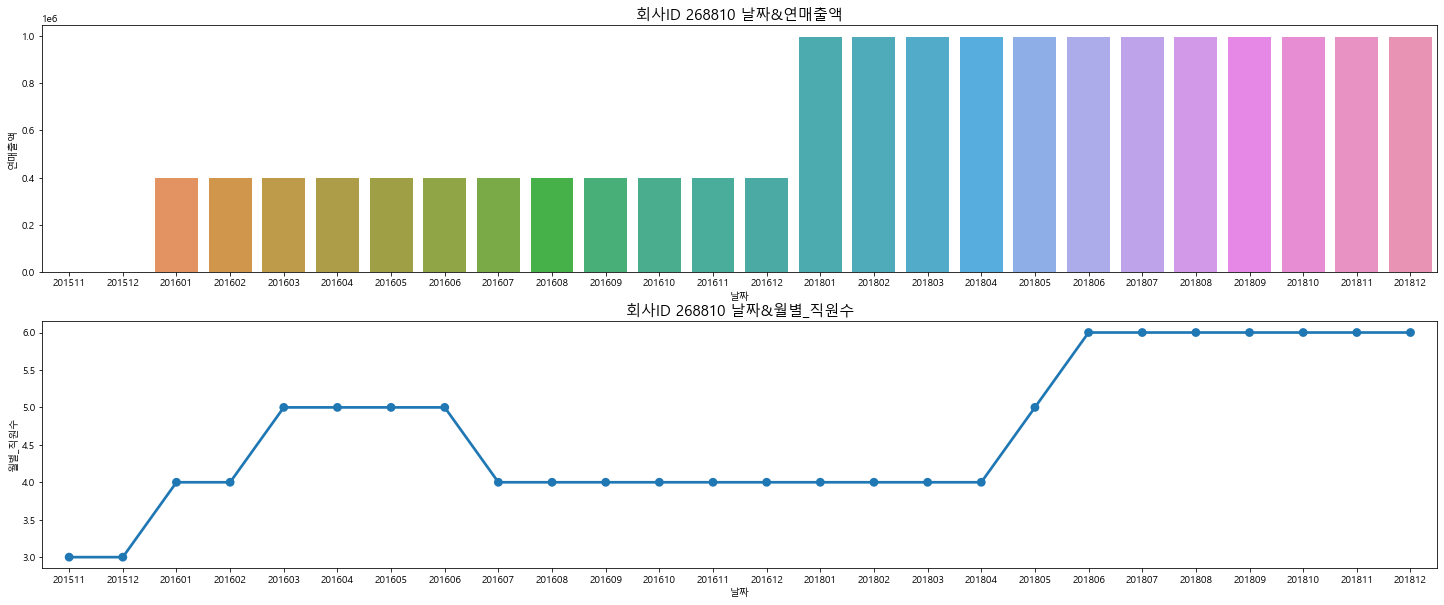

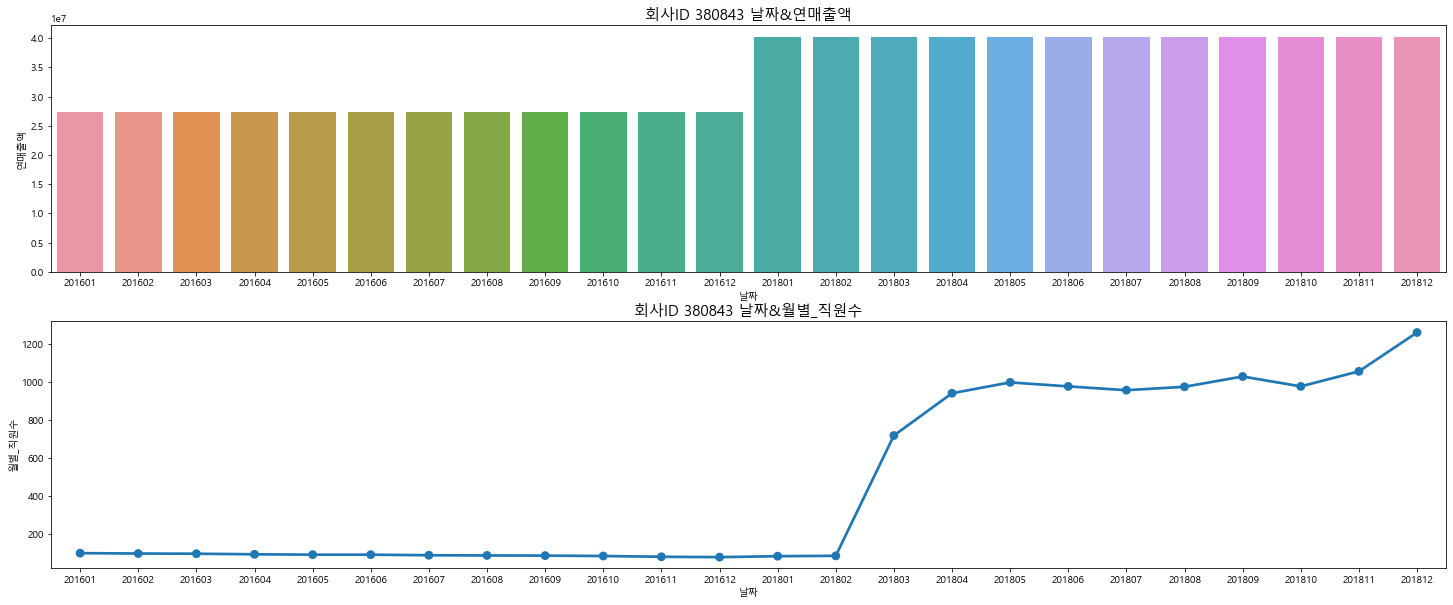

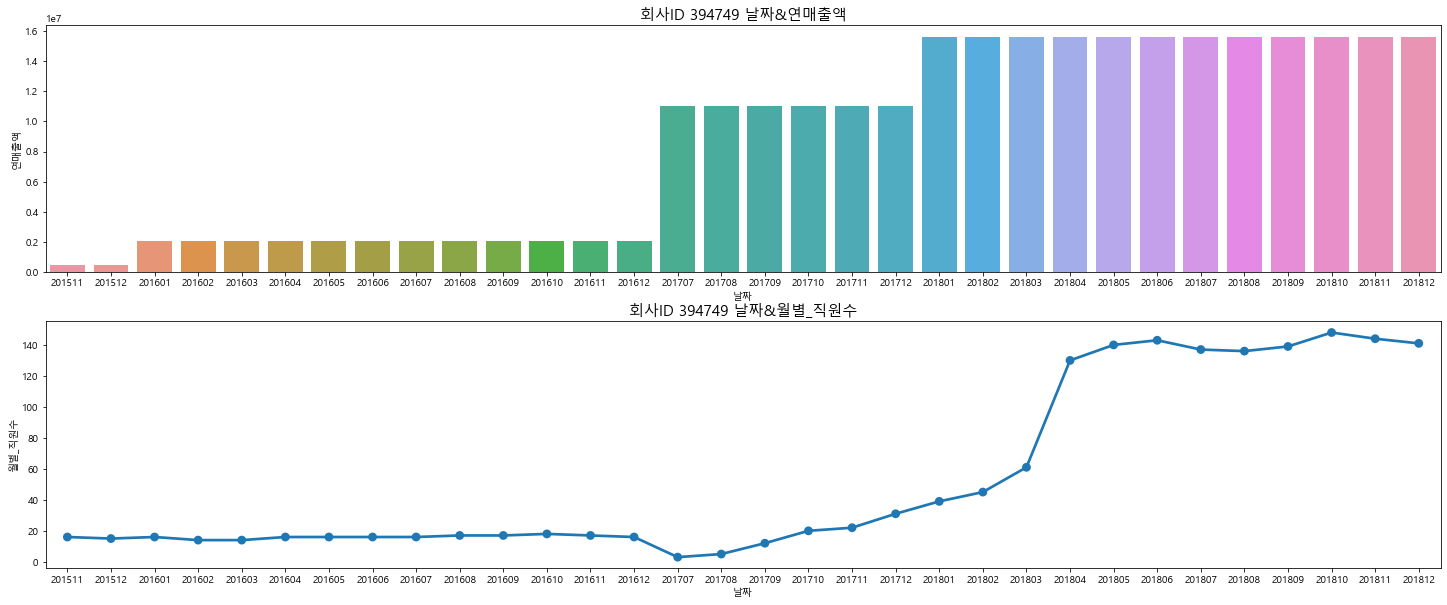

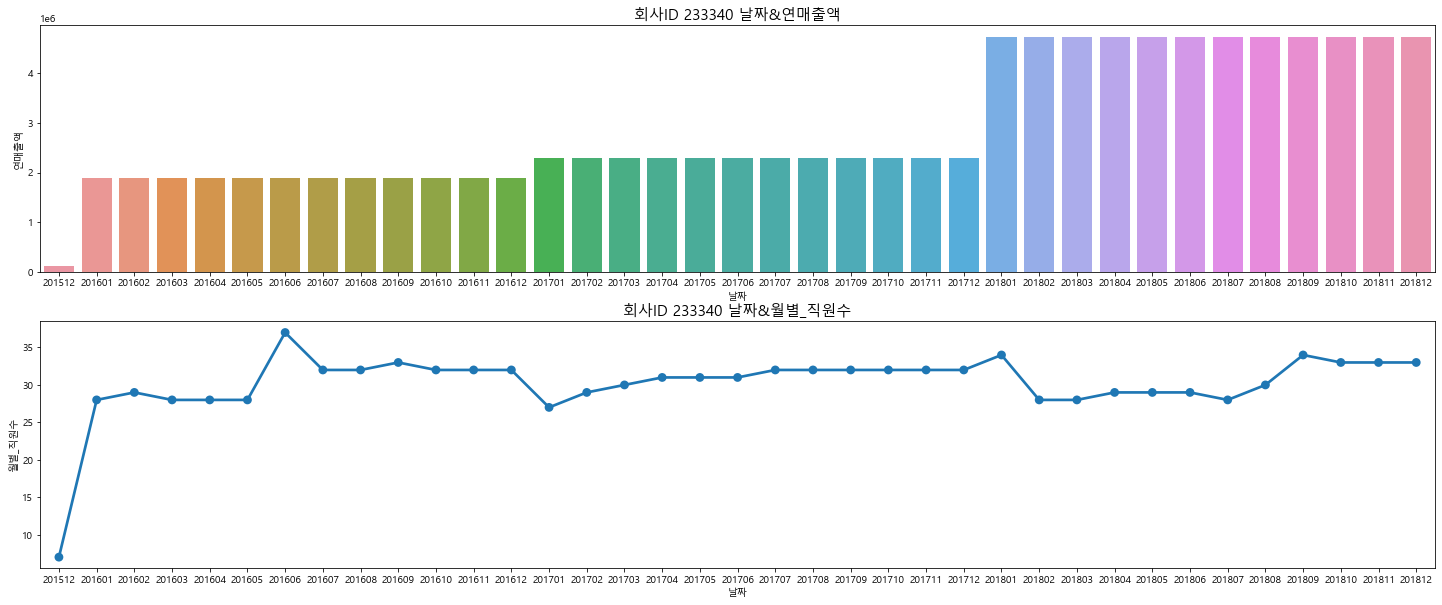

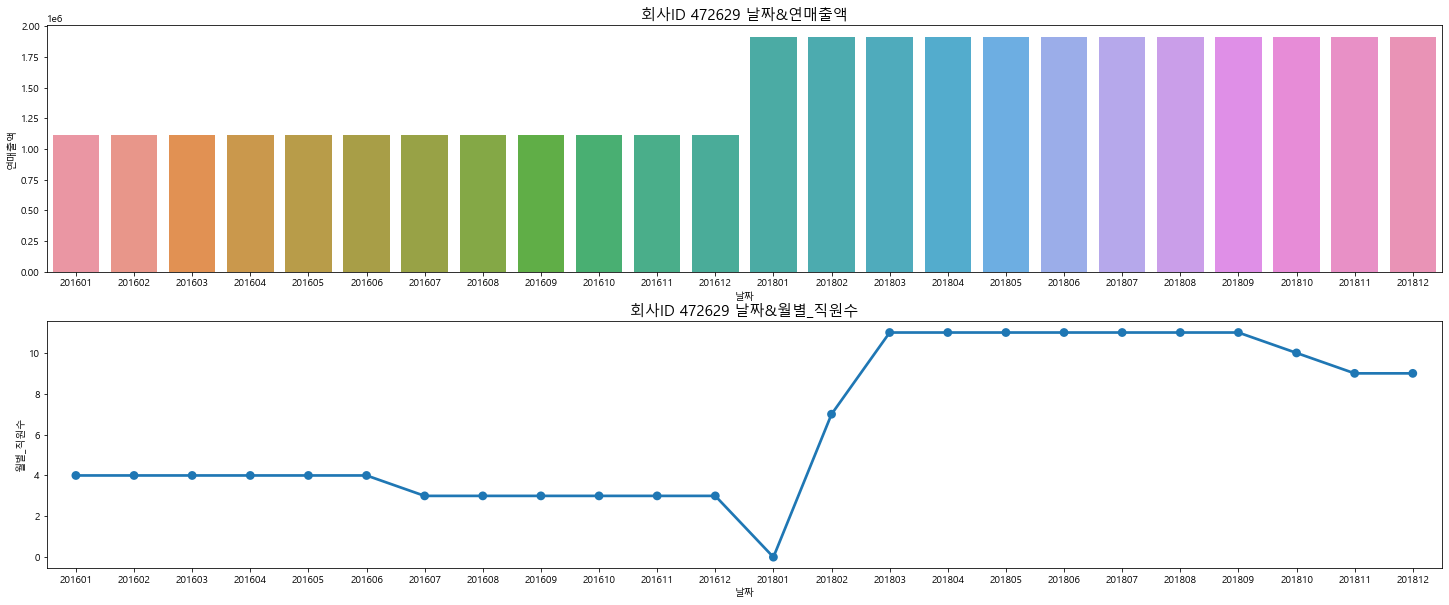

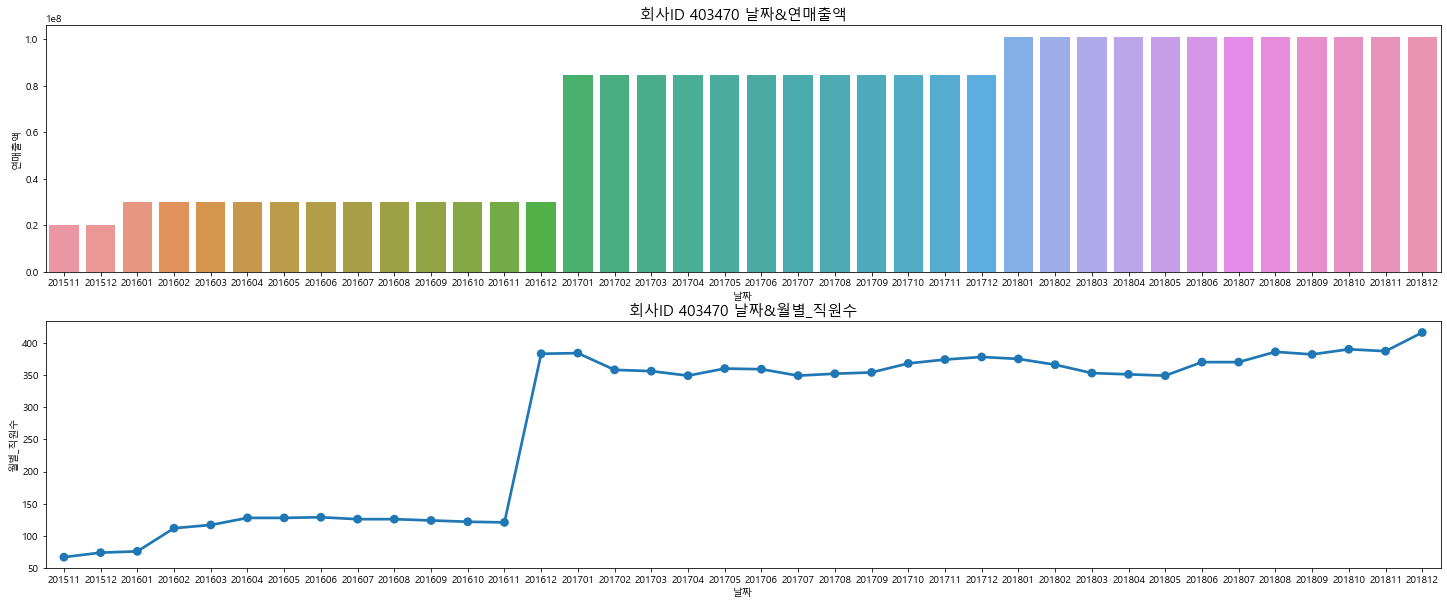

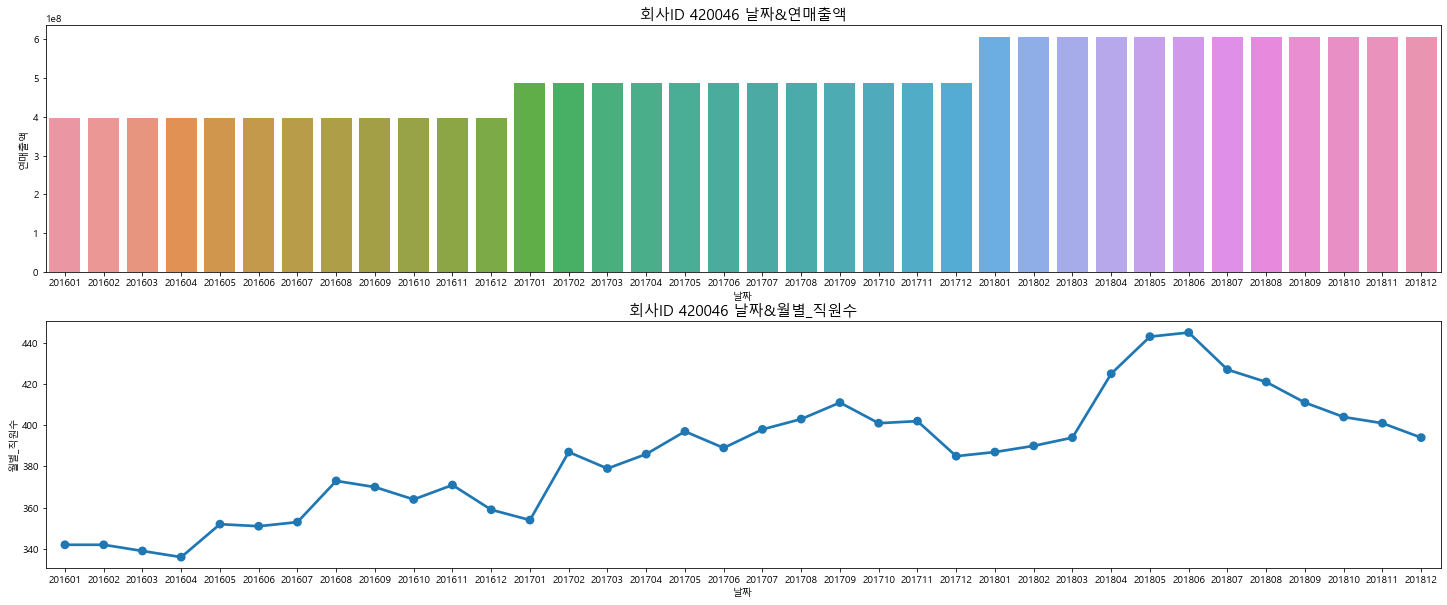

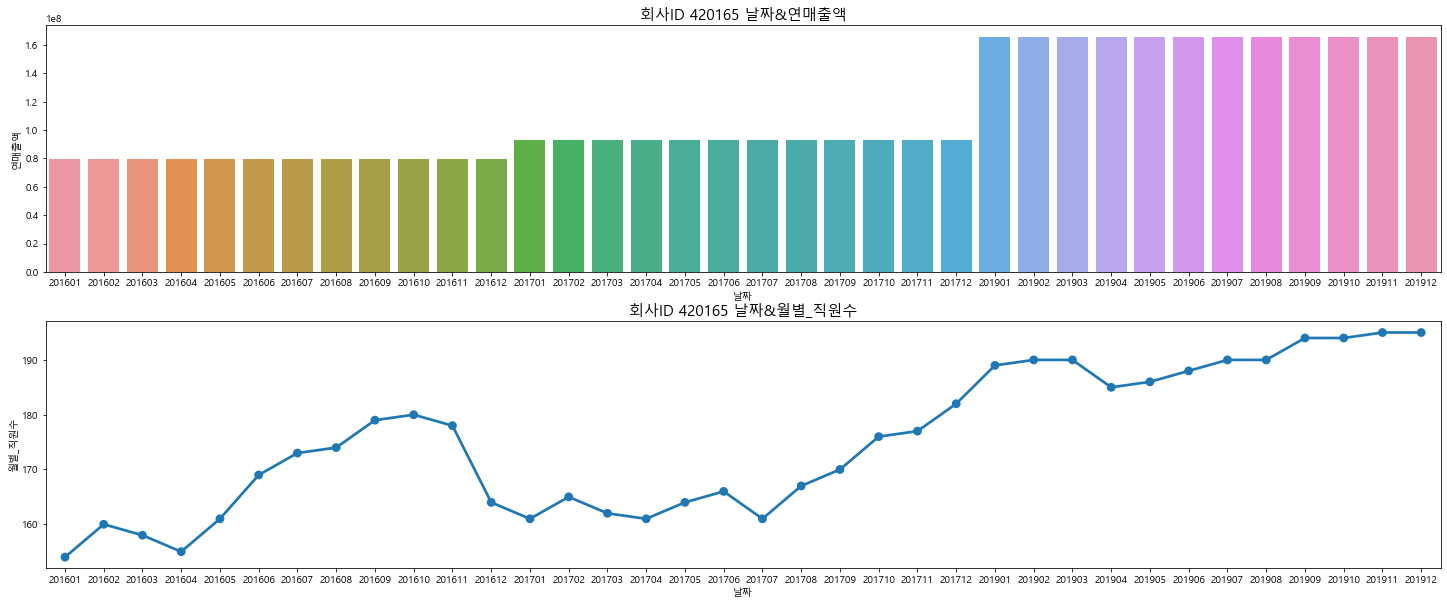

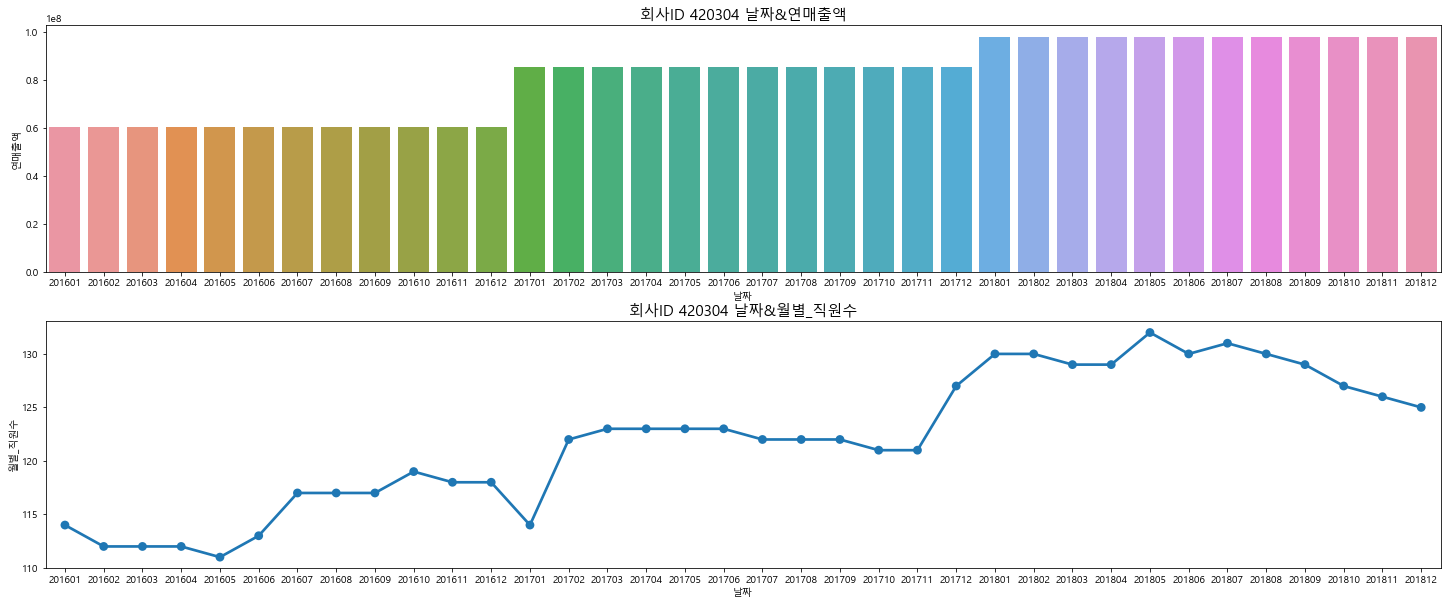

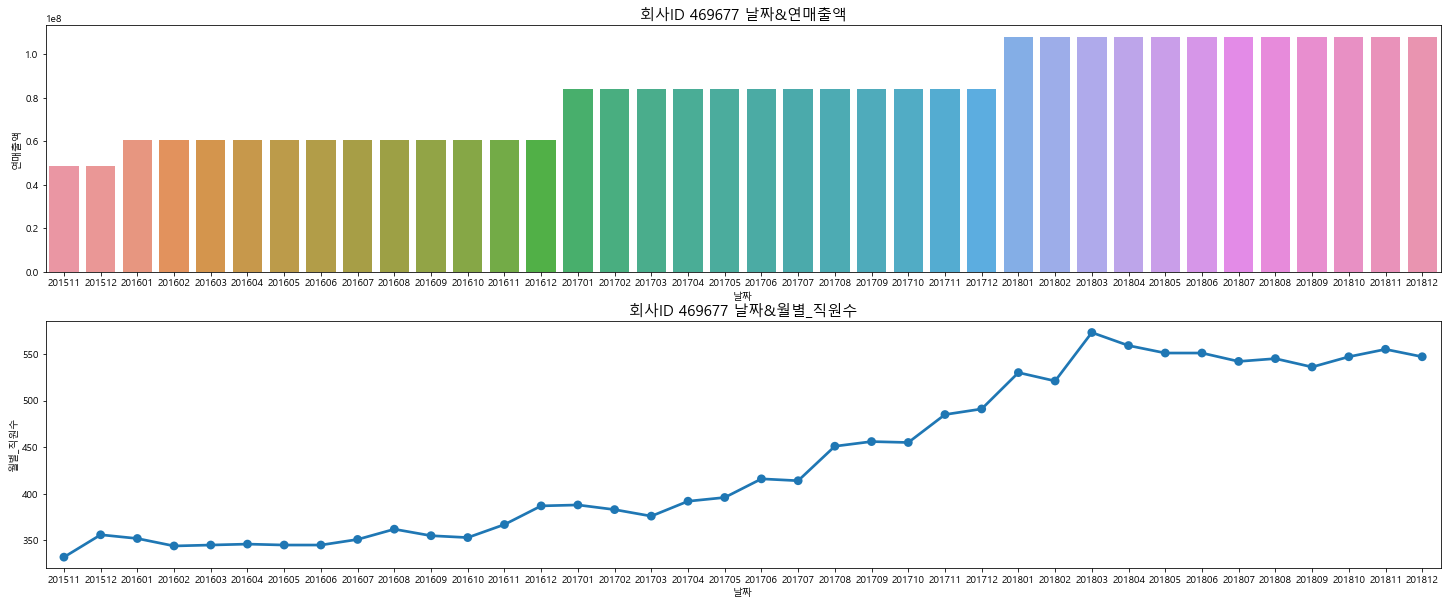

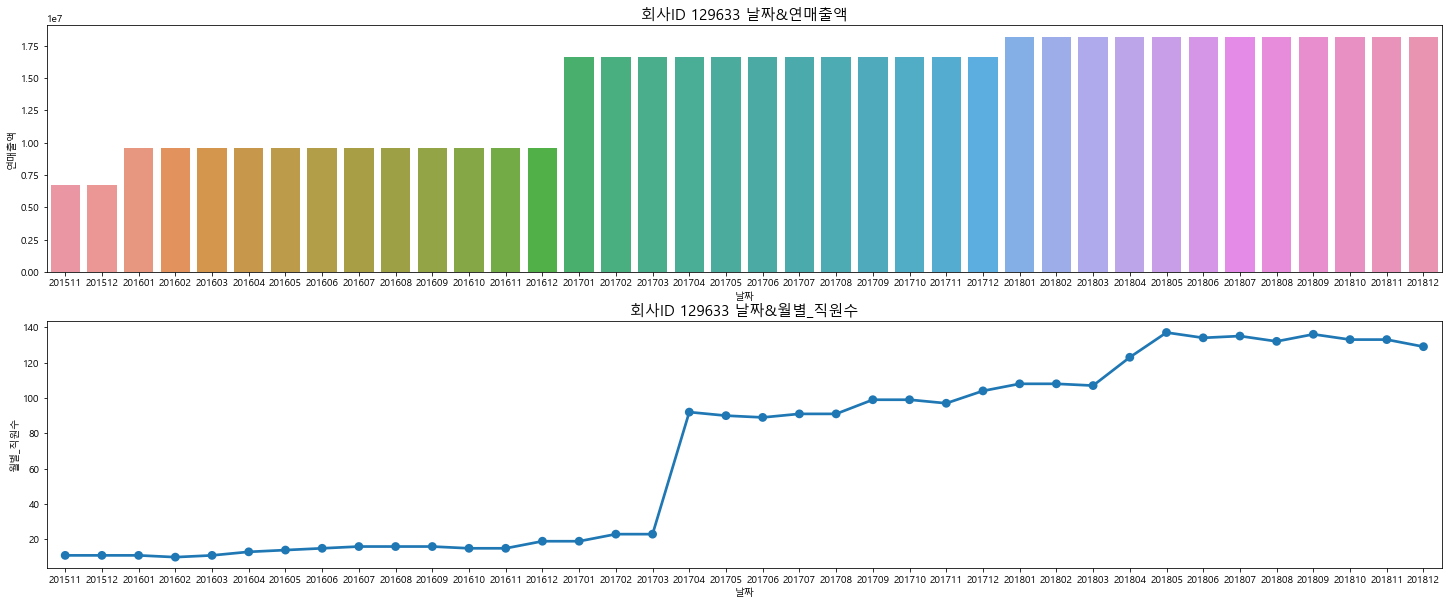

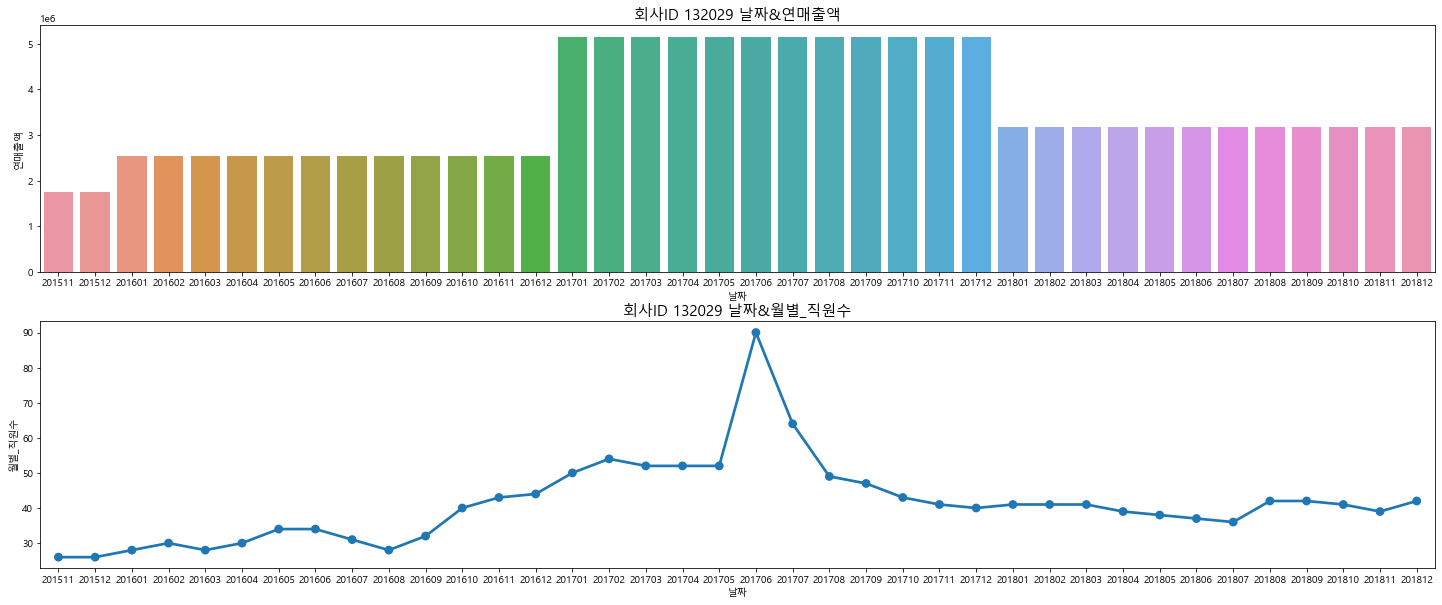

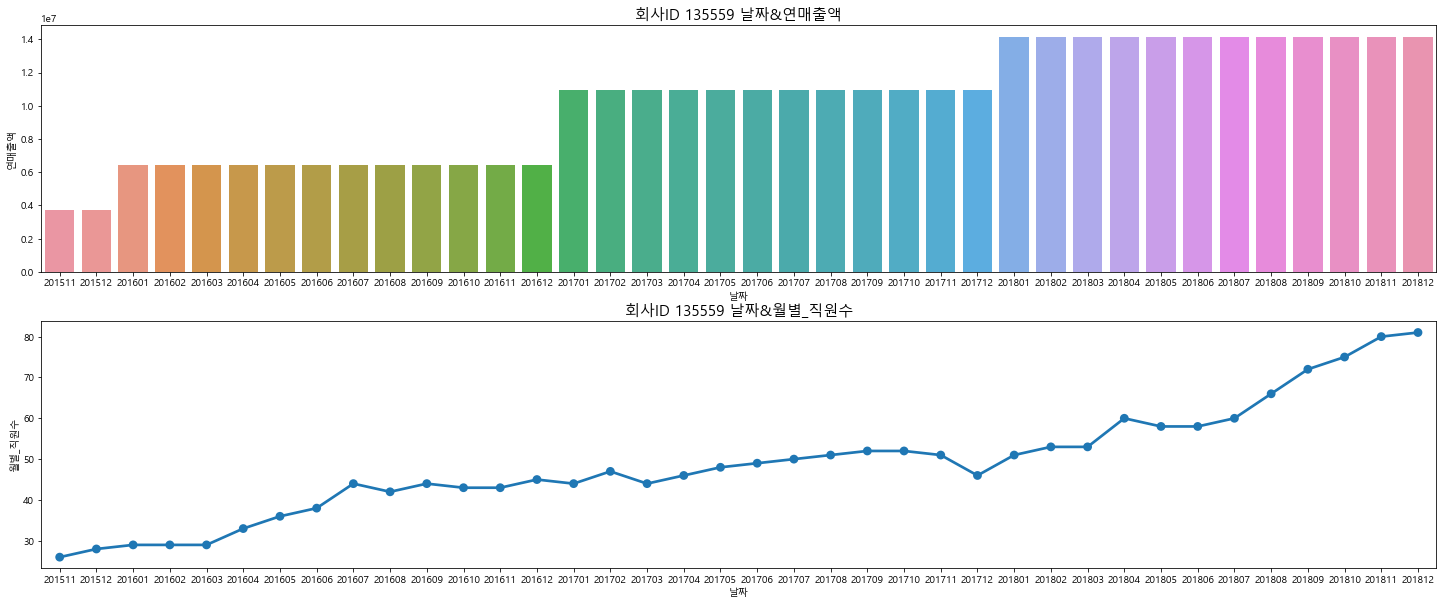

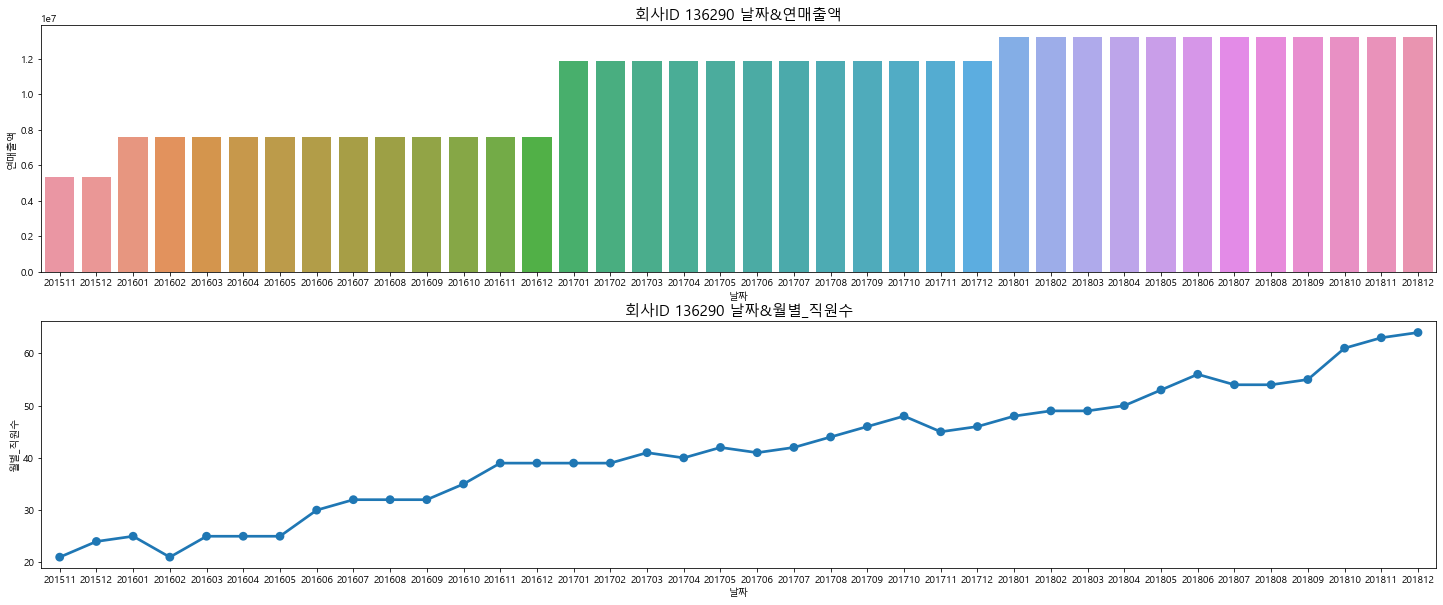

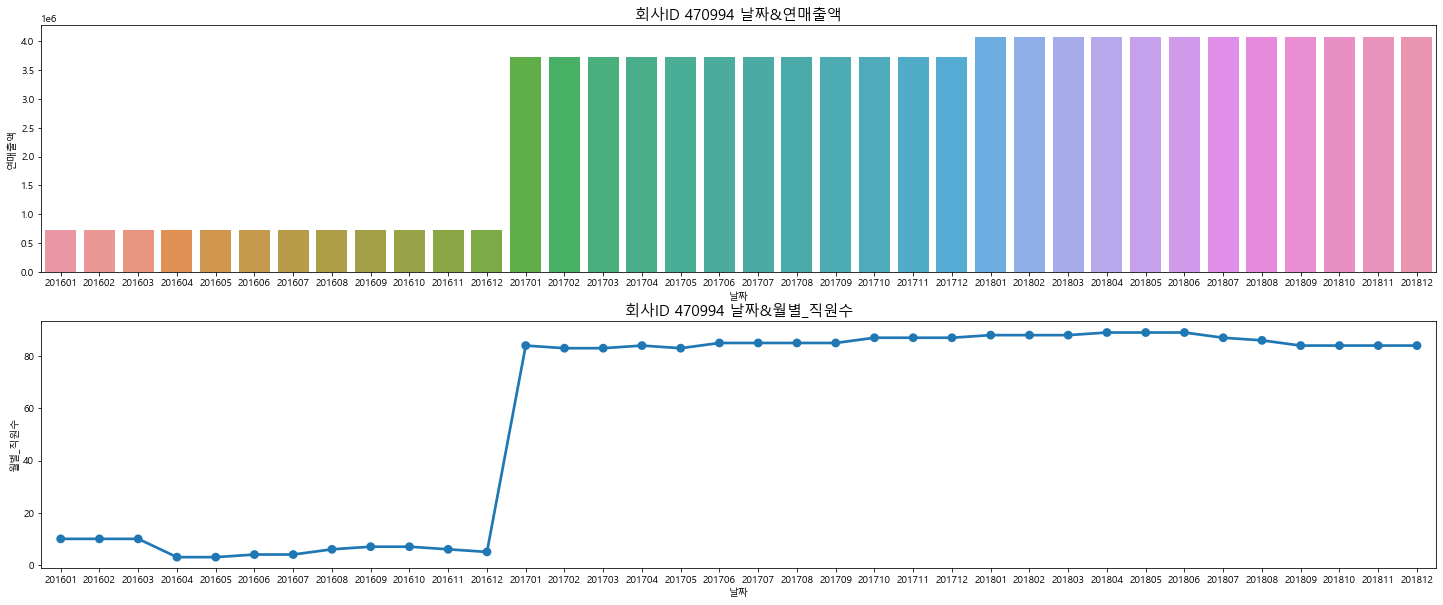

In [101]:
# 날짜&연매출액, 날짜&월별_직원수 변화 그래프
for i in range(len(team)):
    f, ax = plt.subplots(2, 1, figsize=(25, 10))

    sns.barplot(x='날짜', y='연매출액', data=df[df['회사ID'] == team[i]].sort_values(by=['날짜']), ax=ax[0])
    sns.pointplot(data=df[df['회사ID'] == team[i]].sort_values(by=['날짜']), x='날짜', y='월별_직원수', ax=ax[1])
    
    ax[0].set_title("회사ID %s 날짜&연매출액" %team[i], fontsize = 15)
    ax[1].set_title("회사ID %s 날짜&월별_직원수" %team[i], fontsize = 15)  